In [1]:
import os
import pandas as pd
import scipy.stats as sps
import numpy as np
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
from scipy.optimize import curve_fit 

In [2]:
# надо проверить что можно просто дописывать таблицу к таблице, возможно есть проблемы с одинаковыми id или еще что-от
#вроде проверила что все должно быть ок

def get_solution_log(start):
    solution_log = pd.DataFrame()
    for root,dirs,files in os.walk(start):
        for f in files:
            if f == 'solution_log.csv':
                name = os.path.join(root,f)
                solution_log = solution_log.append(pd.read_csv(name))
    return solution_log
                
def get_user_element_progress(start):
    user_element_progress = pd.DataFrame()
    for root,dirs,files in os.walk(start):
        for f in files:
            if f == 'user_element_progress.csv':
                name = os.path.join(root,f)
                user_element_progress = user_element_progress.append(pd.read_csv(name))
    return user_element_progress

def get_user_module_progress(start):
    user_module_progress = pd.DataFrame()
    for root,dirs,files in os.walk(start):
        for f in files:
            if f == 'user_module_progress.csv':
                name = os.path.join(root,f)
                user_module_progress = user_module_progress.append(pd.read_csv(name))
    return user_module_progress


def course(start):
    course = pd.DataFrame()
    for root,dirs,files in os.walk(start):
        for f in files:
            if f == 'course.csv':
                name = os.path.join(root,f)
                course = course.append(pd.read_csv(name))
    return course



In [3]:
start = '/Users/sinya/Desktop/CS центр/Практика Сириус/metrics_validation_data'

user_element_progress = get_user_element_progress(start)
solution_log = get_solution_log(start)
course = course(start)


<ipython-input-2-a60bcb1326fd>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  user_element_progress = user_element_progress.append(pd.read_csv(name))
<ipython-input-2-a60bcb1326fd>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  user_element_progress = user_element_progress.append(pd.read_csv(name))
<ipython-input-2-a60bcb1326fd>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  user_element_progress = user_element_progress.append(pd.read_csv(name))
<ipython-input-2-a60bcb1326fd>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  user_element_progress = user_element_progress.append(pd.read_csv(name))
<ipython-input-2-a60bcb1326fd>:1

<ipython-input-2-a60bcb1326fd>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  solution_log = solution_log.append(pd.read_csv(name))
<ipython-input-2-a60bcb1326fd>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  solution_log = solution_log.append(pd.read_csv(name))
<ipython-input-2-a60bcb1326fd>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  solution_log = solution_log.append(pd.read_csv(name))
<ipython-input-2-a60bcb1326fd>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  solution_log = solution_log.append(pd.read_csv(name))
<ipython-input-2-a60bcb1326fd>:10: FutureWarning: The frame.append method is deprecated and will be remo

In [4]:
course['date_start'] = pd.to_datetime(course['date_start'])
course['close_date'] = pd.to_datetime(course['close_date'])
course['close_date'] = course['close_date'].apply(lambda x: x.date())
course.pop('id')
course.pop('knowledge_area_id')
course['count'] = 1
date_start = course.copy(deep=True)
date_close = course.copy(deep=True)
date_start  = date_start.groupby('date_start').sum()
date_close = date_close.groupby('close_date').sum()
date_start = date_start.reset_index()
date_close = date_close.reset_index()


In [5]:
date_start, date_close

(   date_start  count
 0  2021-08-15      1
 1  2021-09-01      4
 2  2021-09-15      5
 3  2021-10-06      1
 4  2021-11-17      1
 5  2021-12-01      1
 6  2021-12-15      6
 7  2021-12-30      4
 8  2021-12-31      1
 9  2022-01-15      2
 10 2022-01-16      1
 11 2022-01-17      1
 12 2022-01-20      1
 13 2022-02-01      3,
    close_date  count
 0  2021-11-30      5
 1  2021-12-15      5
 2  2022-01-15      1
 3  2022-02-02      1
 4  2022-02-15      1
 5  2022-02-28      1
 6  2022-03-15      5
 7  2022-03-31      6
 8  2022-04-15      3
 9  2022-04-30      4)

In [6]:

df_merged = pd.merge(user_element_progress, solution_log,
                       how='left', left_on='id', right_on = 'element_progress_id')
df_merged = df_merged[df_merged['achieve_reason']=='solved']

In [7]:
df_best = df_merged


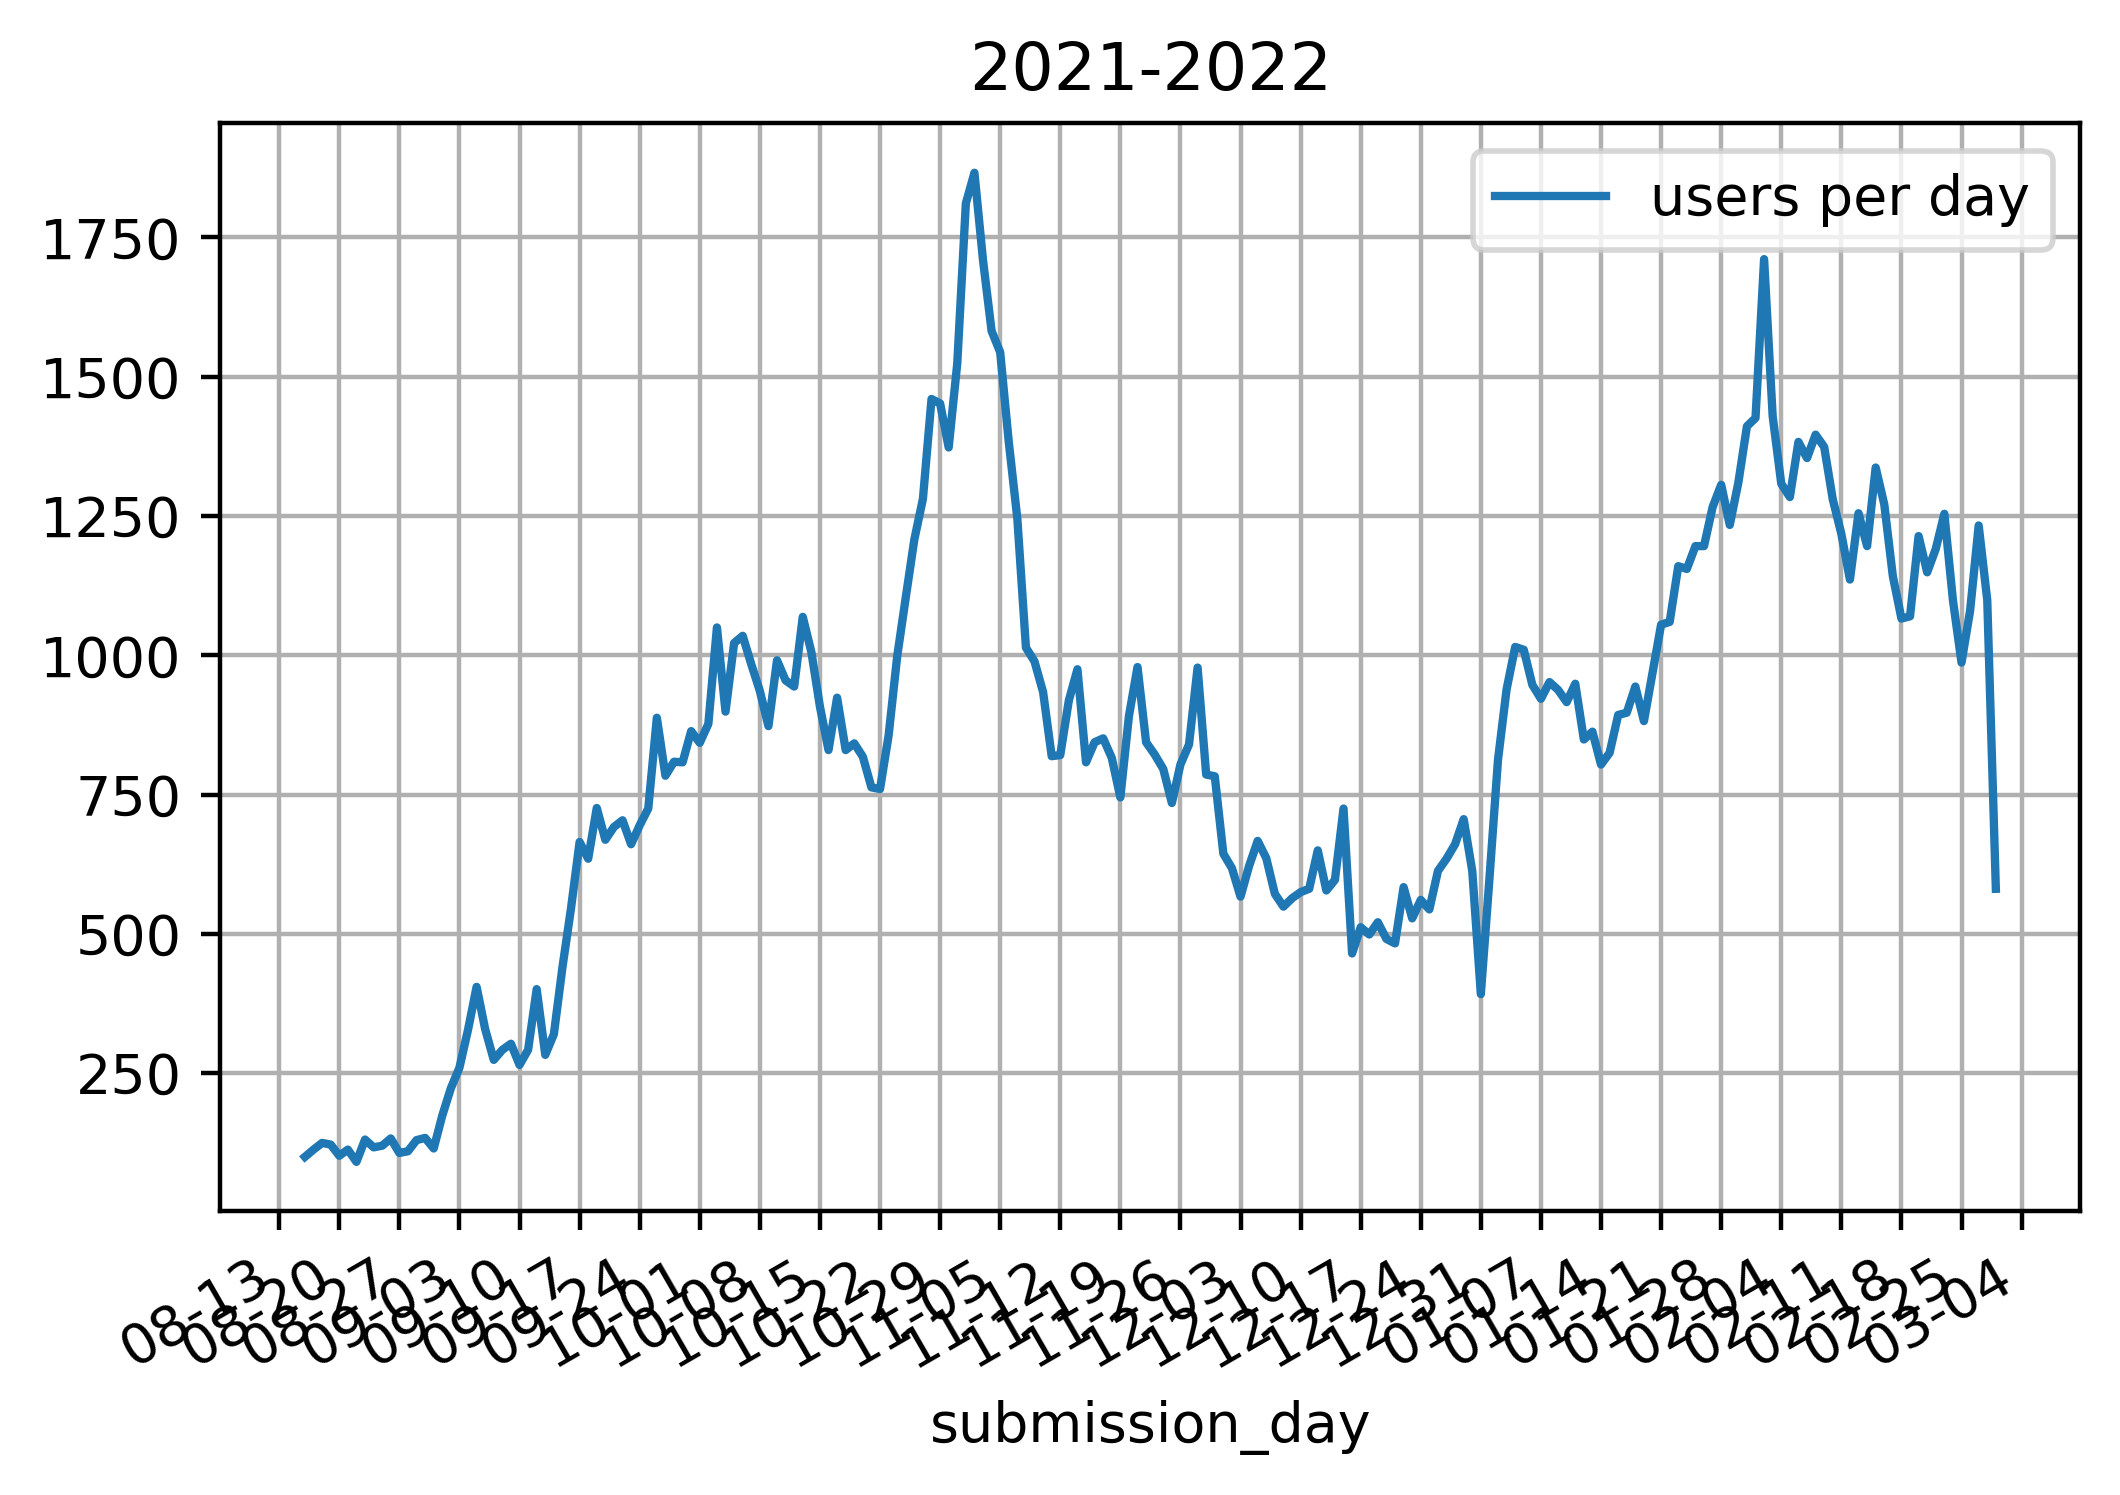

In [8]:
# DayActiveUsers сколько людей в день хоть что-то постило
tasks = df_merged[df_merged['course_element_type']=='task'].sort_values('submission_time')  
tasks['submission_time'] = pd.to_datetime(tasks['submission_time'])
tasks['submission_day'] = tasks['submission_time'].apply(lambda x: x.date())
dau = tasks.groupby('submission_day').agg({'user_id': lambda x: len(set(x))})
dau = tasks.groupby('submission_day').agg({'user_id': lambda x: len(set(x))})
dau.rename(columns={'user_id': 'users per day'}, inplace=True)


dau = dau[dau['users per day']>20]

fig = plt.figure(dpi = 400)
ax = fig.add_subplot(111)

#ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

dau.plot(ax=ax)
fig.autofmt_xdate()

ax.grid(True)
plt.title('2021-2022')
plt.show()

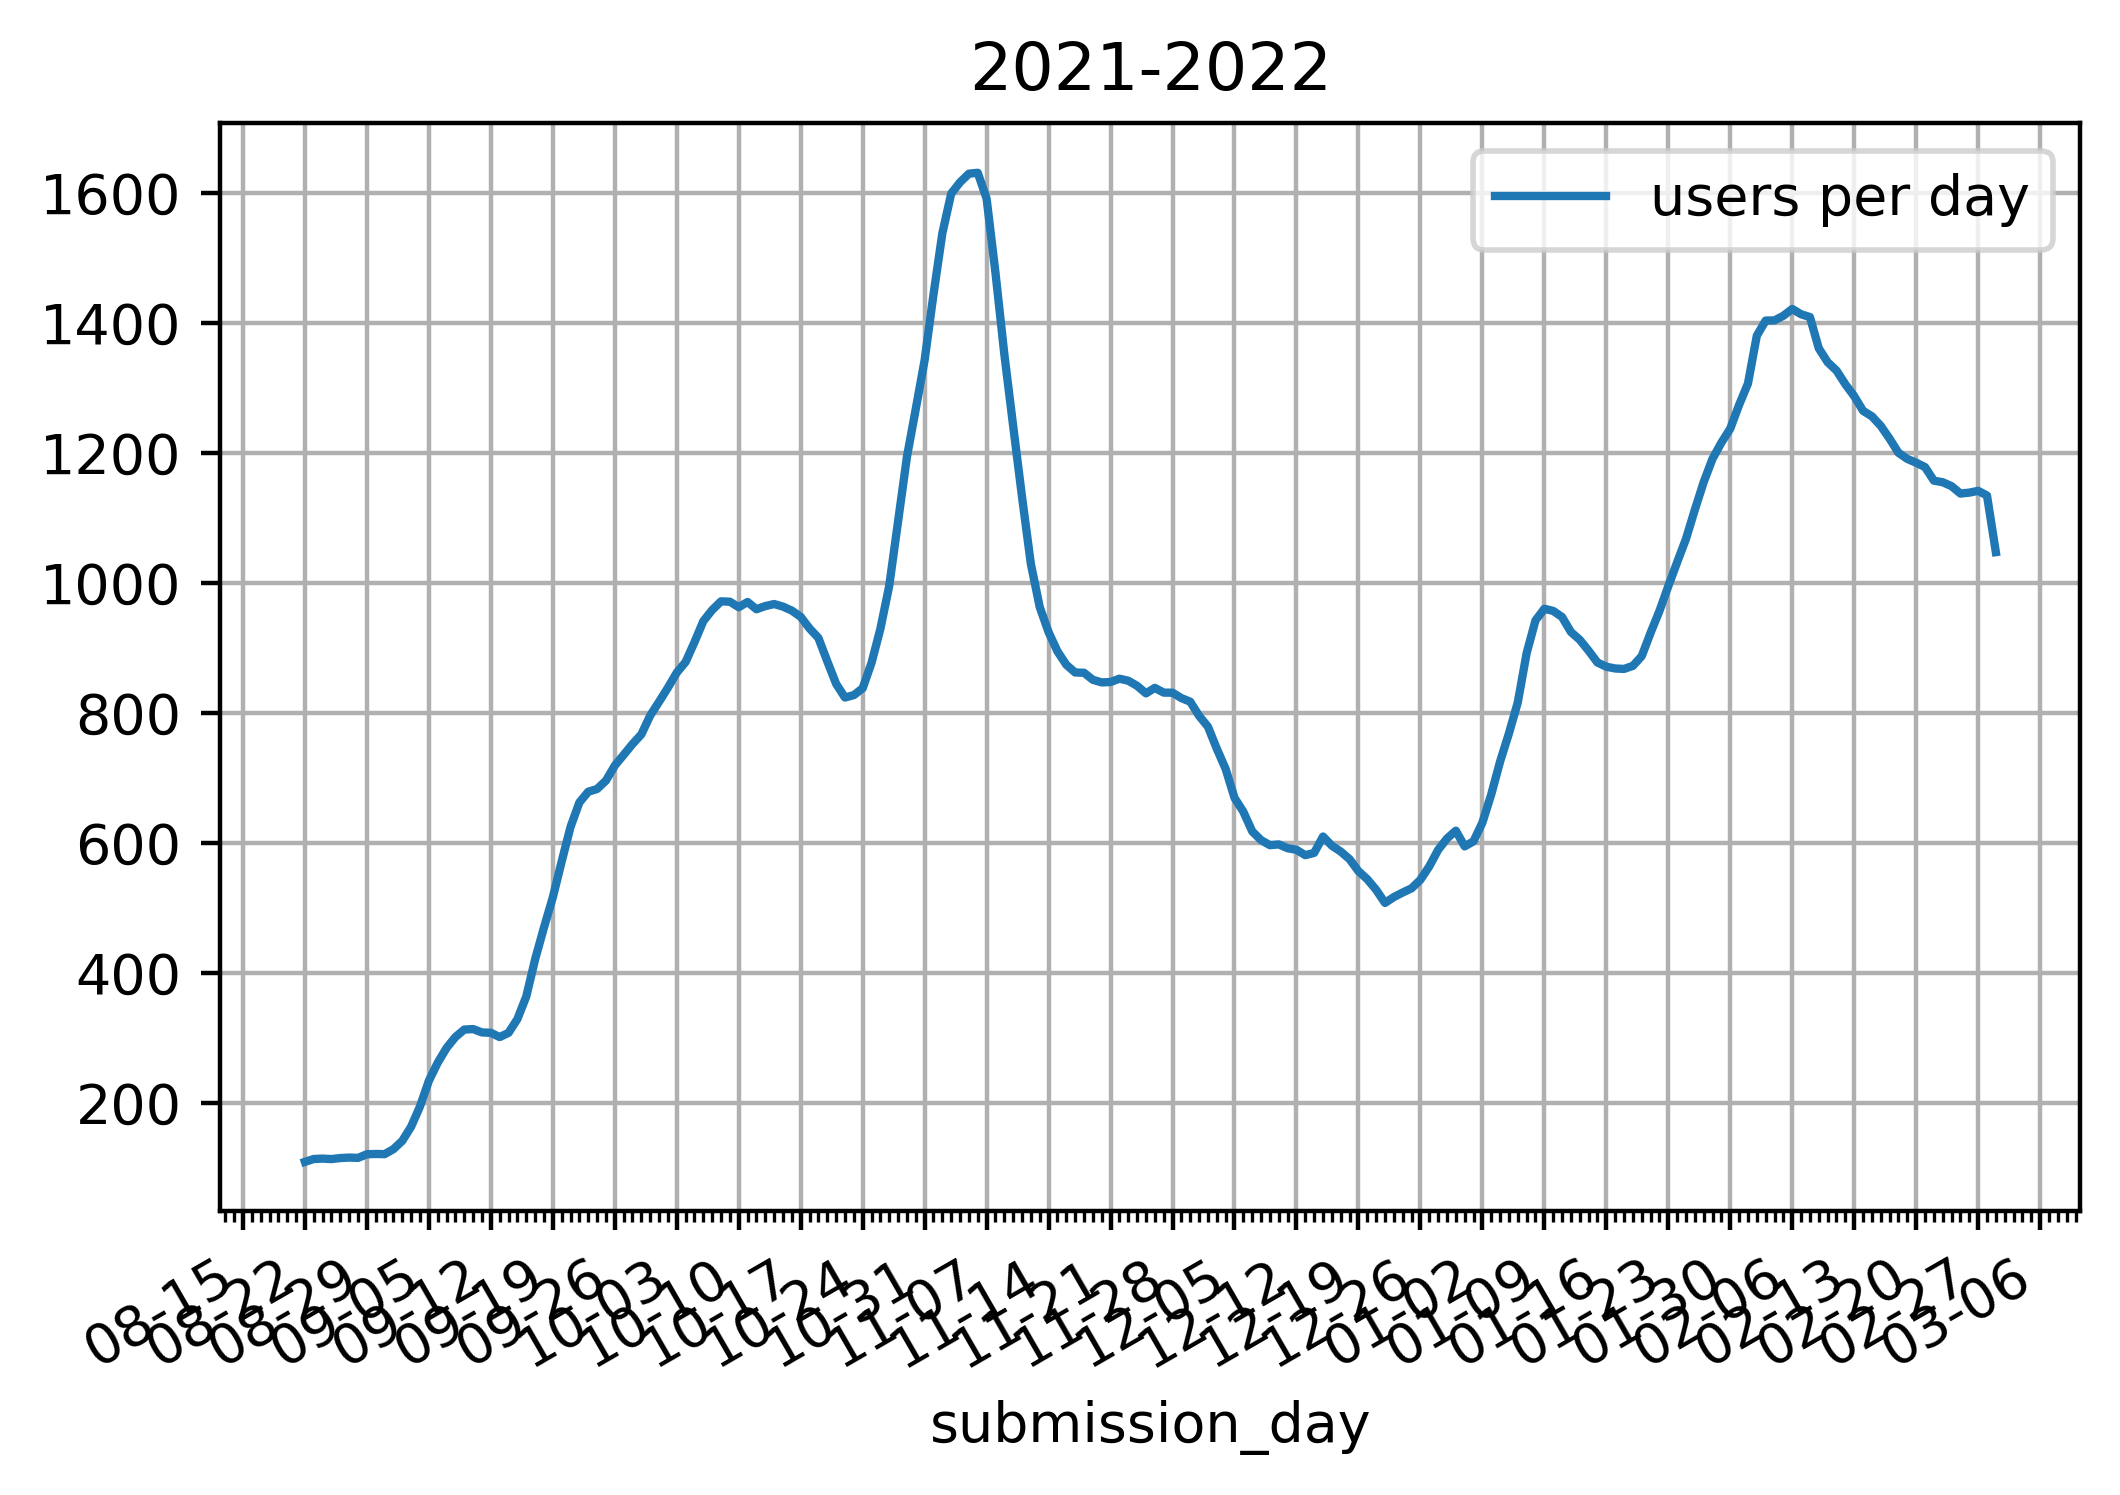

In [7]:
# DayActiveUsers сколько людей в день хоть что-то постило сглаженный

dau = dau.rolling(7).mean()

fig = plt.figure(dpi = 400)
ax = fig.add_subplot(111)

ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

dau.plot(ax=ax)
fig.autofmt_xdate()

ax.grid(True)
plt.title('2021-2022')
plt.show()

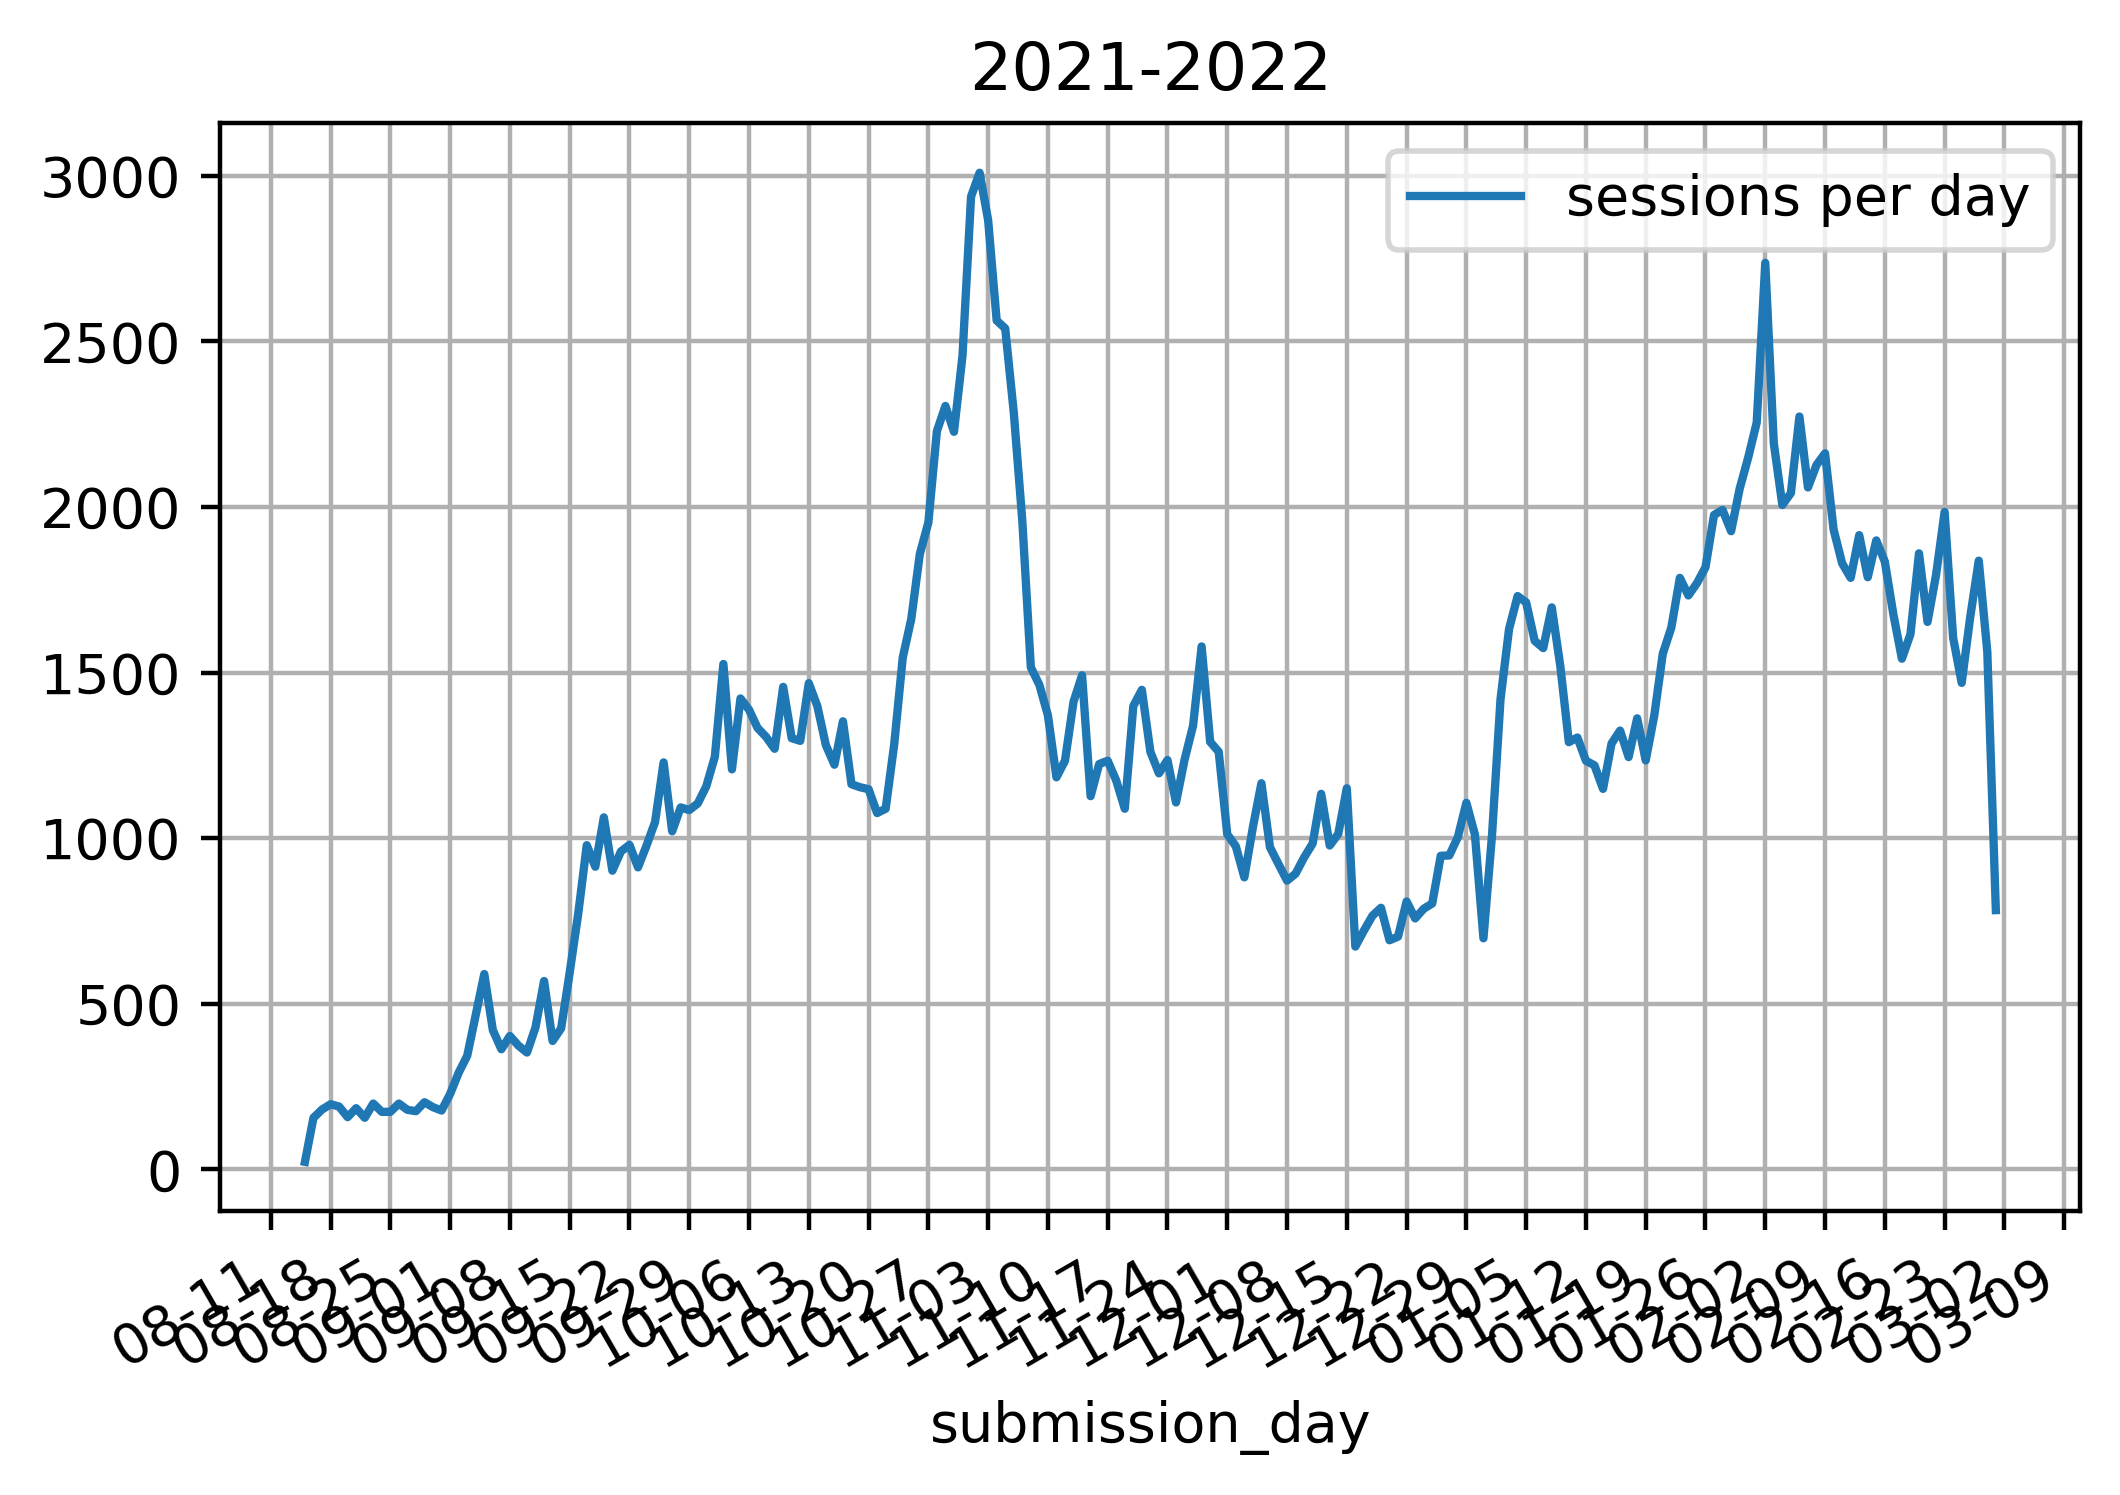

In [9]:
# DayActiveSessions сколько было сессий за день
# Важно: сейчас, сессия пересекающая полночь учитывается в оба дня, возможно надо исправить

def split_session(data , interval = pd.Timedelta('40min')):
    
    sessions = []
    cur_session = [data.values[0]]
    prev_date = data.values[0]

    for cur_date in data.values[1:]:
        if (cur_date - prev_date < interval):
            cur_session.append(cur_date)
        else: 
            sessions.append(cur_session)
            cur_session = [cur_date]
        prev_date = cur_date
        
    sessions.append(cur_session)
    return sessions   # теперь в sessions  у нас хранятся списки временных отметок по сессиям


tasks = df_best[df_best['course_element_type']=='task'].sort_values('submission_time')
tasks['submission_time'] = pd.to_datetime(tasks['submission_time'])
tasks['submission_day'] = tasks['submission_time'].apply(lambda x: x.date())
sessions = tasks.groupby(['submission_day','user_id']).agg({'submission_time': lambda x: split_session(x)})
sessions = sessions.reset_index(level=['submission_day','user_id'])
sessions['submission_time'] = sessions['submission_time'].apply(lambda x: len(x))
das = sessions.groupby('submission_day').sum()
das.pop('user_id')
das.rename(columns={'submission_time': 'sessions per day'}, inplace=True)
das = das[das['sessions per day']>20]

fig = plt.figure(dpi = 400)
ax = fig.add_subplot(111)

#ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

das.plot(ax=ax)
fig.autofmt_xdate()

ax.grid(True)
plt.title('2021-2022')

plt.show()




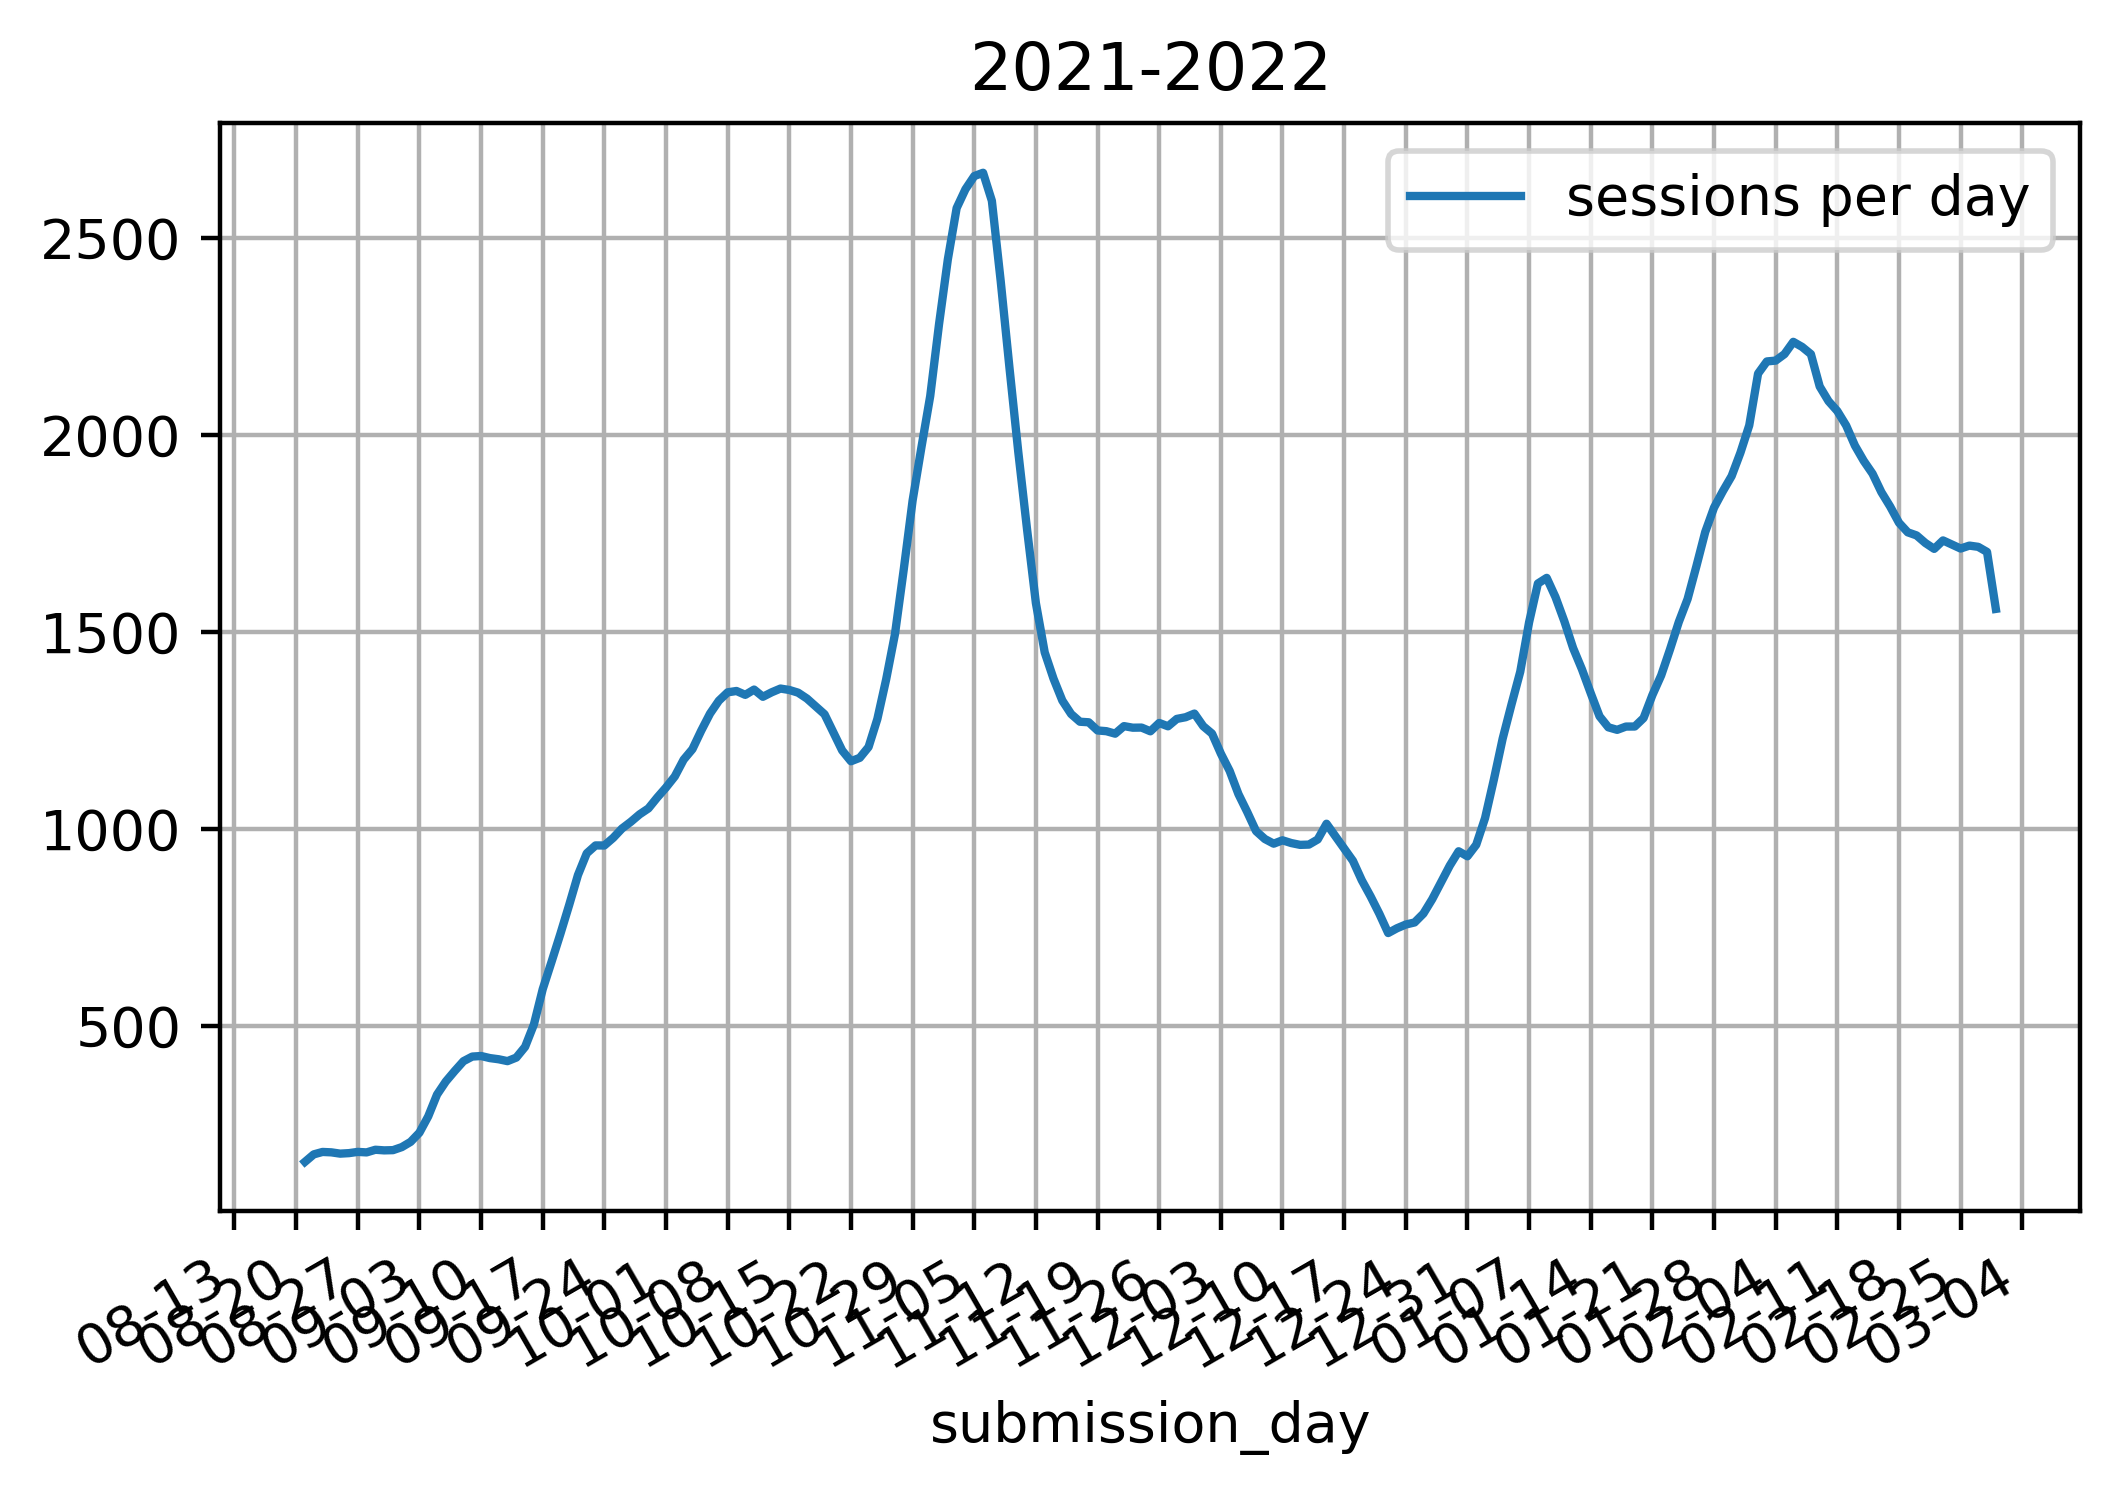

In [11]:
# DayActiveSessions сколько было сессий за день сглаженный

das = das.rolling(7).mean()

fig = plt.figure(dpi = 400)
ax = fig.add_subplot(111)

#ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.title('2021-2022')
das.plot(ax=ax)
fig.autofmt_xdate()

ax.grid(True)

plt.show()

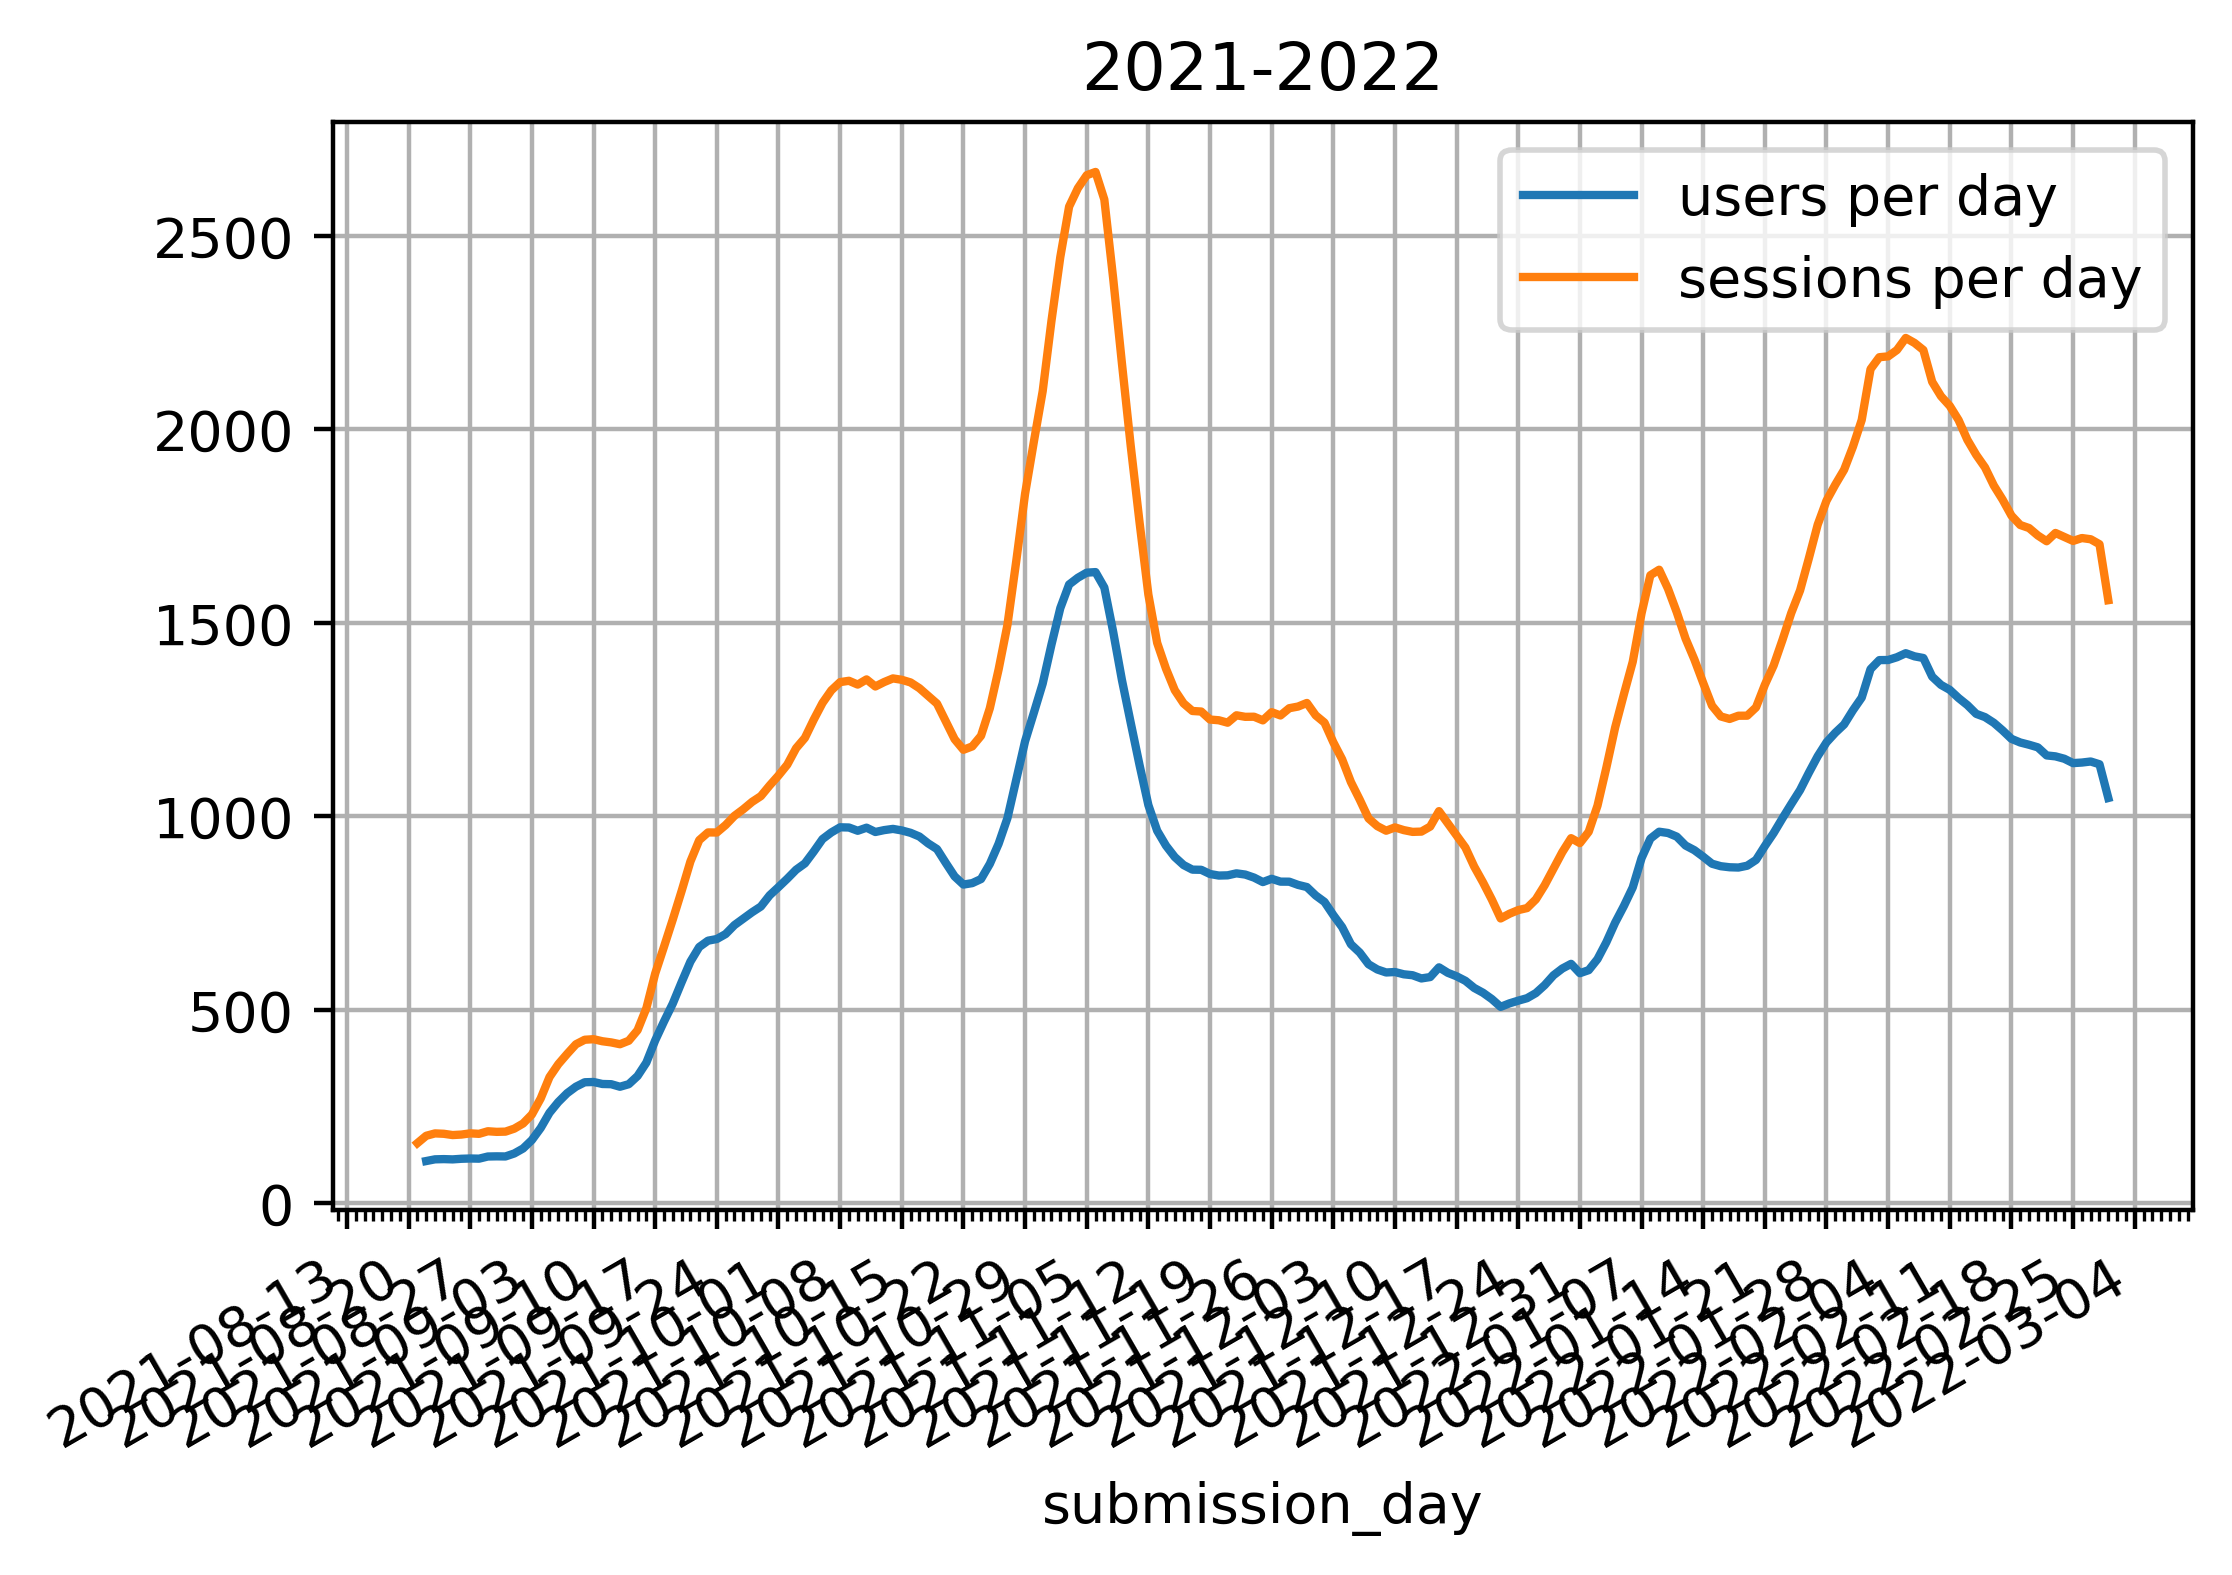

In [13]:
# построим число юзеров число сессий в одних осях, видна огромная корреляция
fig = plt.figure(dpi = 400)
ax = fig.add_subplot(111)

ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

dau.plot(ax=ax)
das.plot(ax=ax)
fig.autofmt_xdate()
plt.title('2021-2022')
ax.grid(True)

plt.show()



In [21]:
sessions_per_user = das.copy(deep=True)
sessions_per_user['users per day'] = dau['users per day']
sessions_per_user = sessions_per_user.reset_index()
sessions_per_user = sessions_per_user[sessions_per_user['submission_day']>datetime.date(2021,8,25)]
sessions_per_user = sessions_per_user.set_index('submission_day')

#plt.title('2021-2022')
#plt.plot(sessions_per_user['users per day'],sessions_per_user['sessions per day'],'o')
#plt.ylabel('sessions per day', fontsize=10)
#plt.xlabel('users per day', fontsize=10)
#plt.show()

,sessions per day,users per day
submission_day,,
2021-08-26,177.857143,115.285714
2021-08-27,181.000000,116.000000
2021-08-28,179.714286,115.571429
2021-08-29,186.428571,121.142857
2021-08-30,184.857143,121.571429
2021-08-31,185.428571,121.285714
2021-09-01,193.142857,129.000000
2021-09-02,206.428571,141.857143
2021-09-03,229.714286,163.714286


Arguments:  [  1.57736981 -56.69758422]
Co-Variance:  [[ 2.27557440e-04 -1.94567336e-01]
 [-1.94567336e-01  1.94572773e+02]]


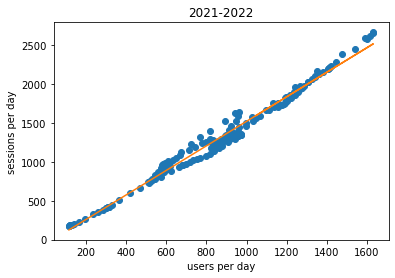

In [27]:
sessions_per_user = das.copy(deep=True)
sessions_per_user['users per day'] = dau['users per day']
sessions_per_user = sessions_per_user.reset_index()
sessions_per_user = sessions_per_user[sessions_per_user['submission_day']>datetime.date(2021,8,25)]
sessions_per_user = sessions_per_user.set_index('submission_day')

values_x = np.array(sessions_per_user['users per day'])
values_y = np.array(sessions_per_user['sessions per day'])
def mapping(values_x, a, b, ): 
    return a * values_x + b 
args, covar = curve_fit(mapping, values_x, values_y) 
print("Arguments: ", args) 
print("Co-Variance: ", covar) 
a, b = args[0], args[1]
y_fit = a * values_x + b 
plt.title('2021-2022')
plt.plot(values_x,values_y,'o')
plt.plot(values_x, y_fit, label="y = a * x + b") 
plt.ylabel('sessions per day', fontsize=10)
plt.xlabel('users per day', fontsize=10)
plt.show()


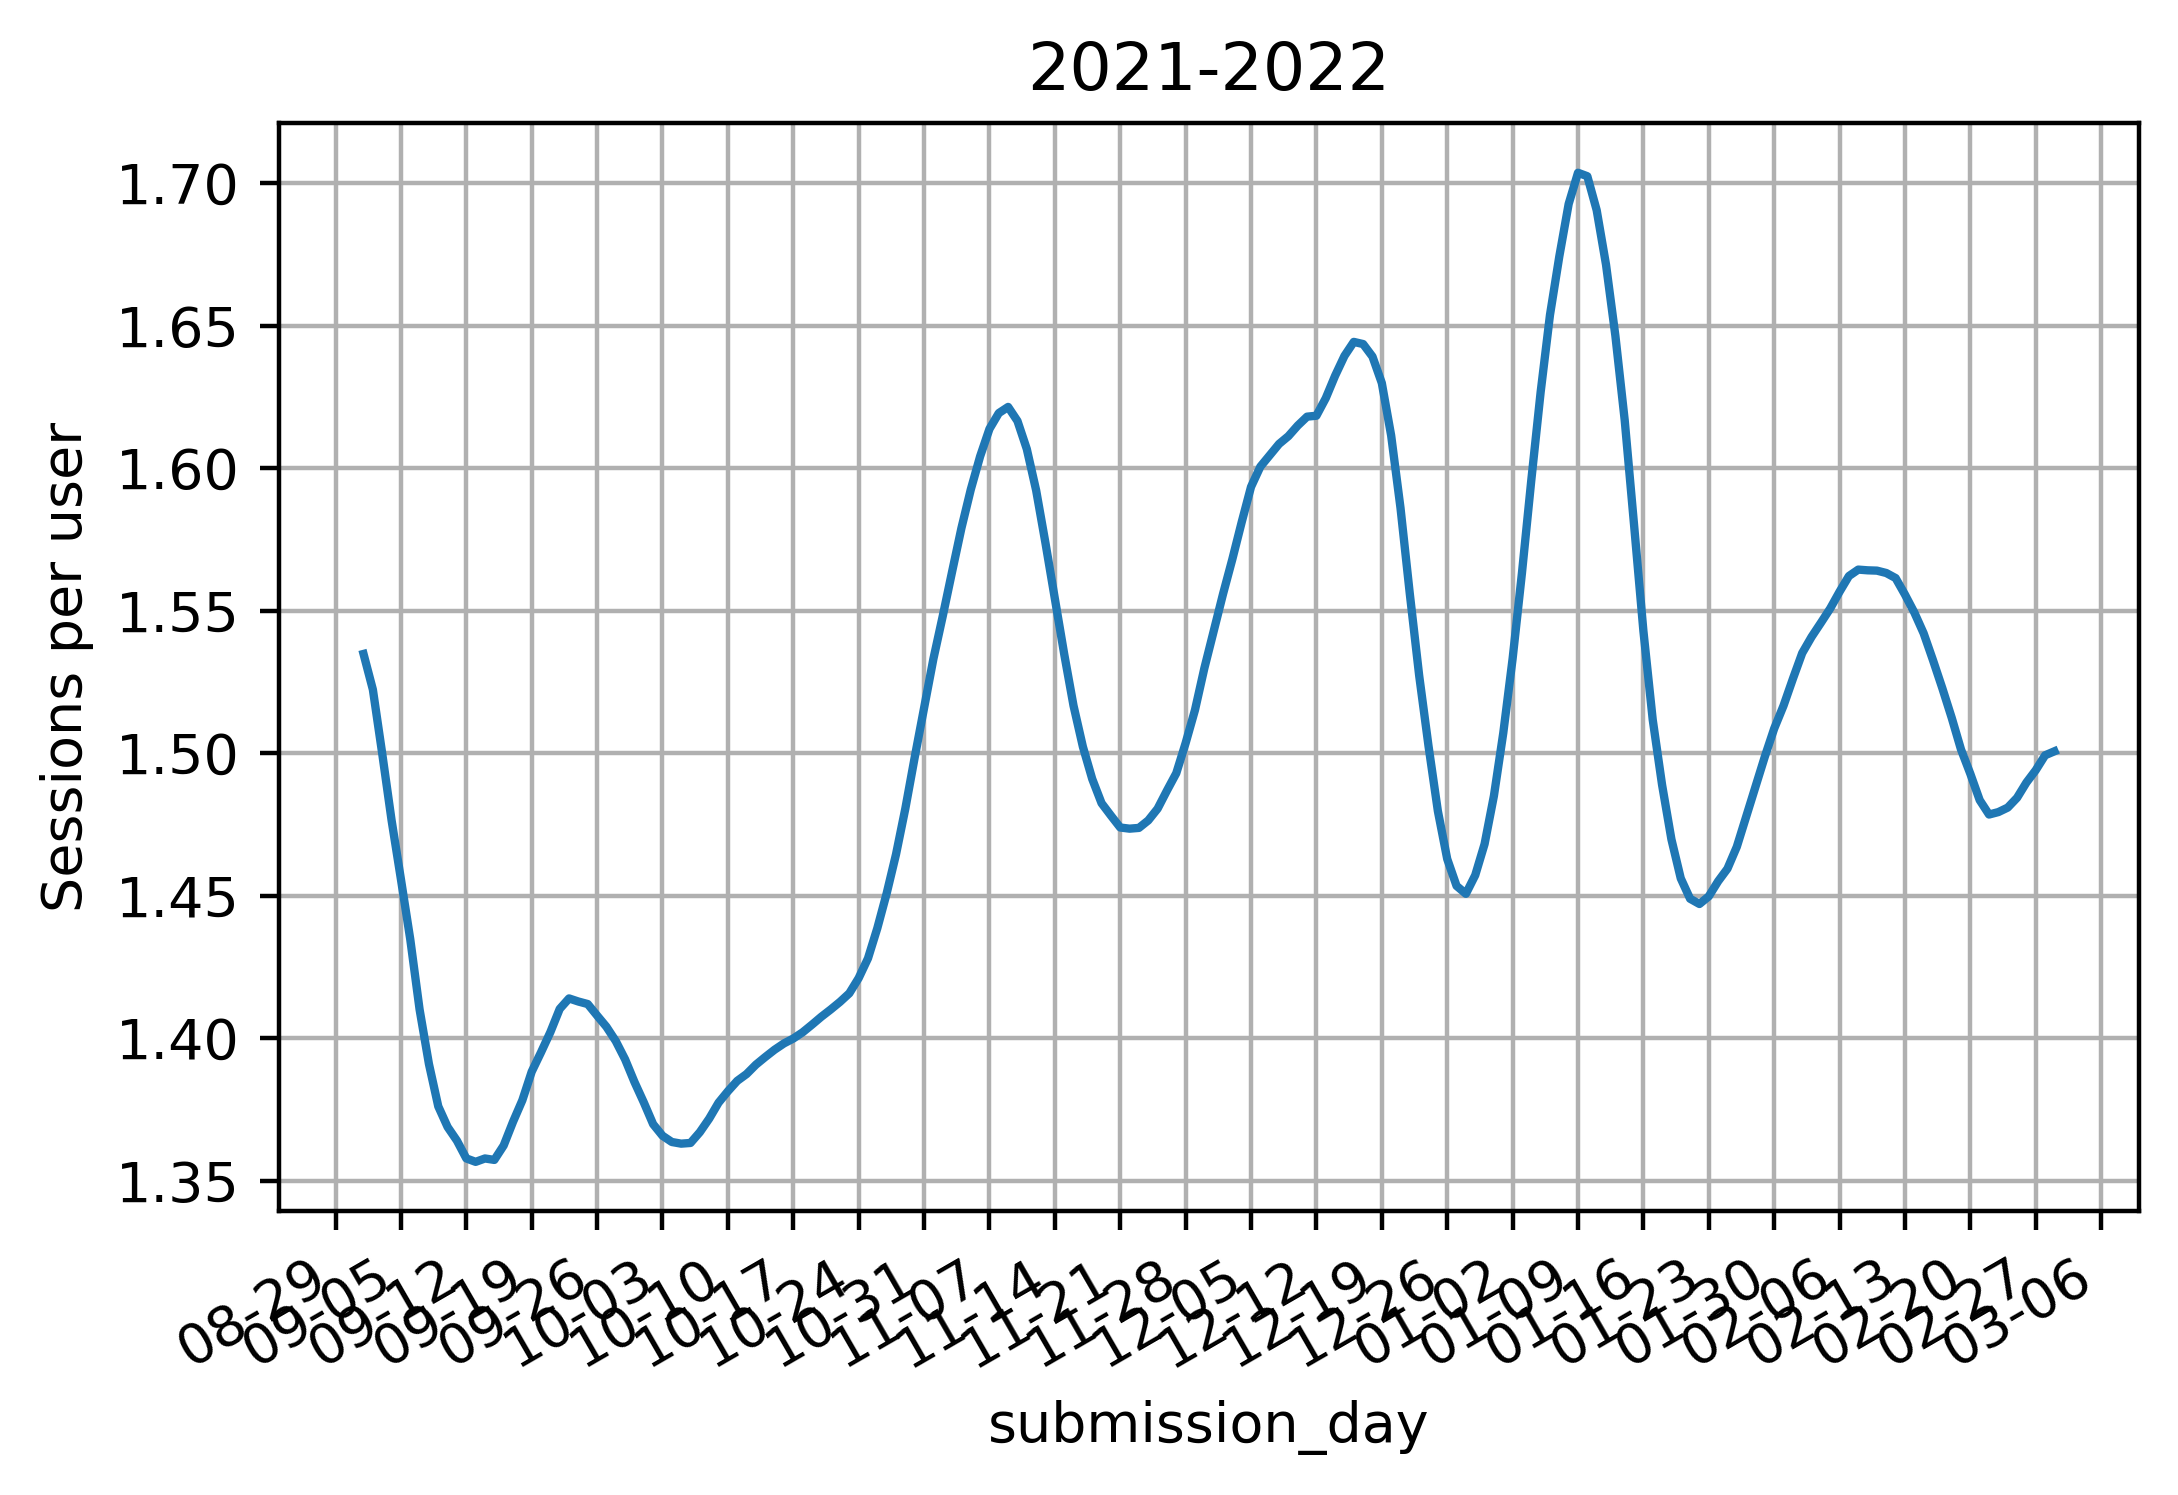

In [14]:
# число сессий на одного юзера в день 
sessions_per_user = das.copy(deep=True)
sessions_per_user['users per day'] = dau['users per day']
sessions_per_user['sessions per day/users per day'] = sessions_per_user['sessions per day']/sessions_per_user['users per day']
sessions_per_user = sessions_per_user.reset_index()
sessions_per_user = sessions_per_user[sessions_per_user['submission_day']>datetime.date(2021,8,25)]
sessions_per_user = sessions_per_user.set_index('submission_day')

fig = plt.figure(dpi = 400)


ax = fig.add_subplot(111)

#ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

sessions_per_user['sessions per day/users per day'].rolling(7).mean().plot(ax=ax)
plt.title('2021-2022')
plt.ylabel('Sessions per user', fontsize=10)
fig.autofmt_xdate()

ax.grid(True)

plt.show()



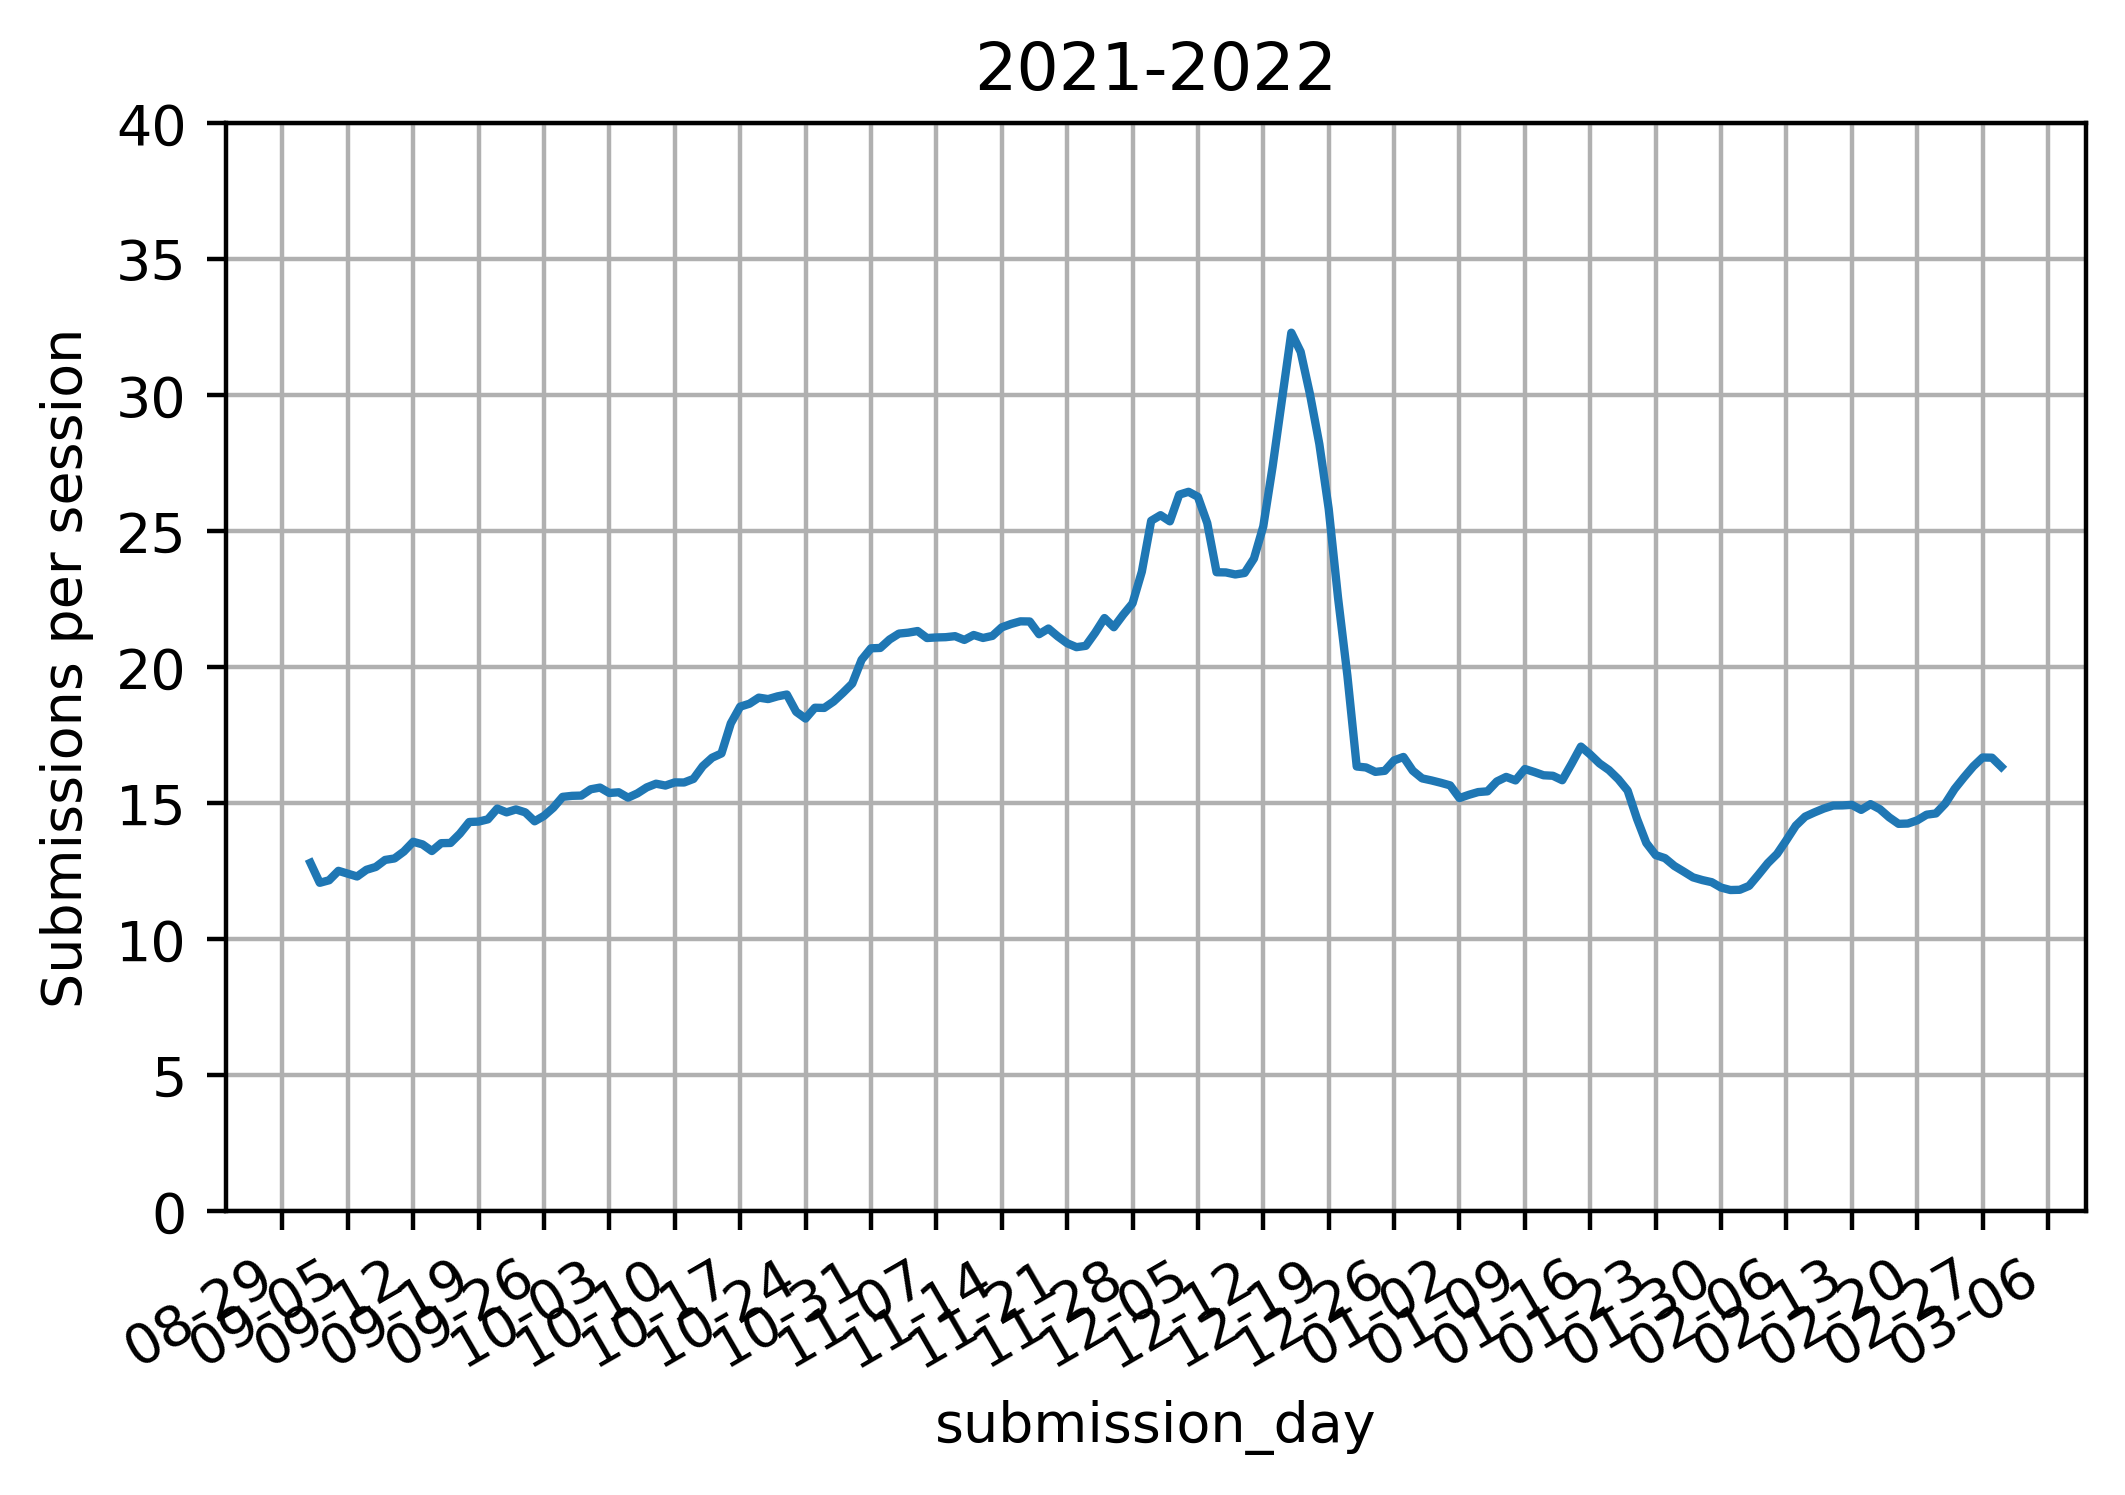

In [14]:
# AverageSubmission per session среднее число посылок за сессию

tasks = df_best[df_best['course_element_type']=='task'].sort_values('submission_time')
tasks['submission_time'] = pd.to_datetime(tasks['submission_time'])
tasks['submission_day'] = tasks['submission_time'].apply(lambda x: x.date())
sessions = tasks.groupby(['submission_day','user_id']).agg({'submission_time': lambda x: split_session(x)})
sessions = sessions.reset_index(level=['submission_day','user_id'])
sessions['num_of_sessions'] = sessions['submission_time'].apply(lambda x: len(x))
sessions['num_of_submissions'] = sessions.apply({'submission_time': lambda x: sum([len(i) for i in x])})

sessions = sessions[sessions['submission_day']>datetime.date(2021,8,25)]
asn = sessions.groupby('submission_day').sum()

asn['submission per session'] = asn['num_of_submissions']/asn['num_of_sessions']


fig = plt.figure(dpi = 400)
ax = fig.add_subplot(111)

plt.title('2021-2022')
plt.ylabel('Submissions per session', fontsize=10)
#ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
asn['submission per session'].rolling(7).mean().plot(ax=ax)
fig.autofmt_xdate()
ax.grid(True)
plt.ylim(0, 40)
plt.show()




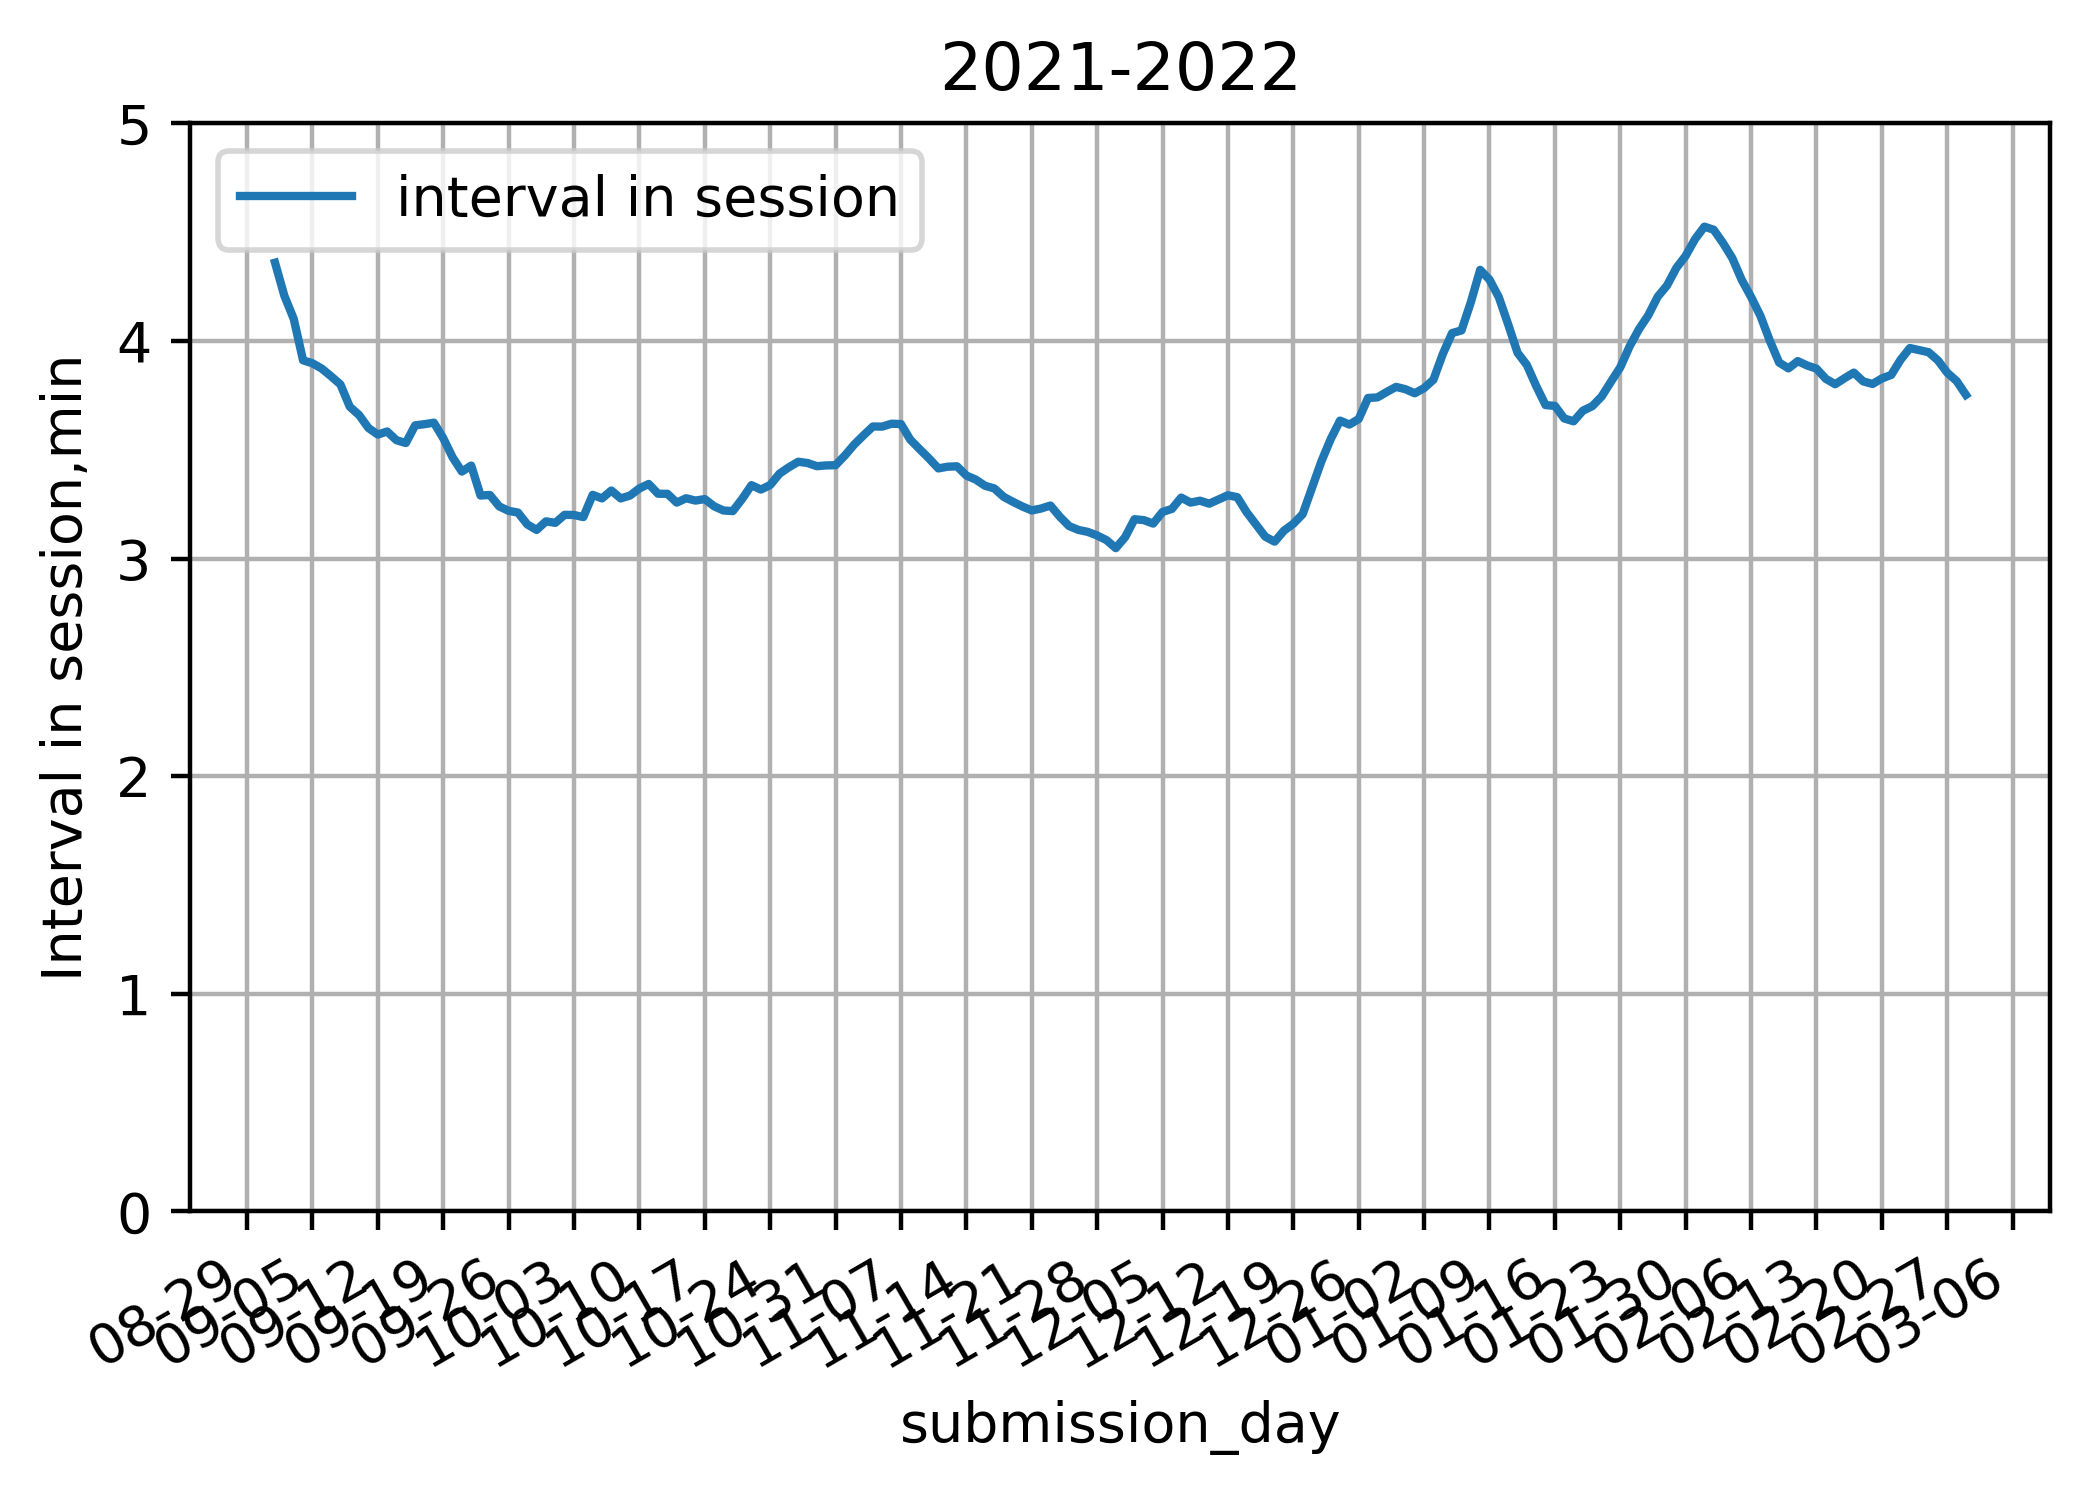

In [22]:
# средний промежуток между посылками в сессии
# единственный пока не сглаженный

def interval_in_session(cur_session):
    delays = []
    prev_date = cur_session[0]
    for cur_date in cur_session[1:]:
        delays.append((cur_date - prev_date)/ np.timedelta64(1, 'm')) #переведем интервал в минуты
        prev_date = cur_date
    return delays

def interval(sessions):
    delays = []
    for session in sessions:
        delays+=interval_in_session(session)
    if delays == []:
        return 0
    return np.mean(delays)

tasks = df_best[df_best['course_element_type']=='task'].sort_values('submission_time')
tasks['submission_time'] = pd.to_datetime(tasks['submission_time'])
tasks['submission_day'] = tasks['submission_time'].apply(lambda x: x.date())
sessions = tasks.groupby(['submission_day','user_id']).agg({'submission_time': lambda x: split_session(x)})
sessions = sessions.reset_index(level=['submission_day','user_id'])
sessions['interval_between_sessions'] = sessions['submission_time'].apply(lambda x: interval(x))
sessions.pop('submission_time')

sessions['count'] = 1
days = set(sessions['submission_day'])
graph = []
for day in days:
    ais = sessions[sessions['submission_day'] == day].interval_between_sessions.mean()
    graph.append([day,ais])
    
graph.sort(key = lambda x: x[0])
interval = pd.DataFrame([y[1] for y in graph], index = [x[0] for x in graph])


interval = interval.reset_index()
interval =interval[interval['index']>datetime.date(2021,8,25)]
interval.rename(columns={'index': 'submission_day'}, inplace=True)
interval = interval.set_index('submission_day')
interval.rename(columns={0 : 'interval in session'}, inplace=True)
fig = plt.figure(dpi = 400)
ax = fig.add_subplot(111)
plt.title('2021-2022')
plt.ylabel('Interval in session,min', fontsize=10)


#ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

interval.rolling(7).mean().plot(ax=ax)
fig.autofmt_xdate()

ax.grid(True)
plt.ylim(0, 5)
plt.show()




<ipython-input-10-b00ab50d9491>:38: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


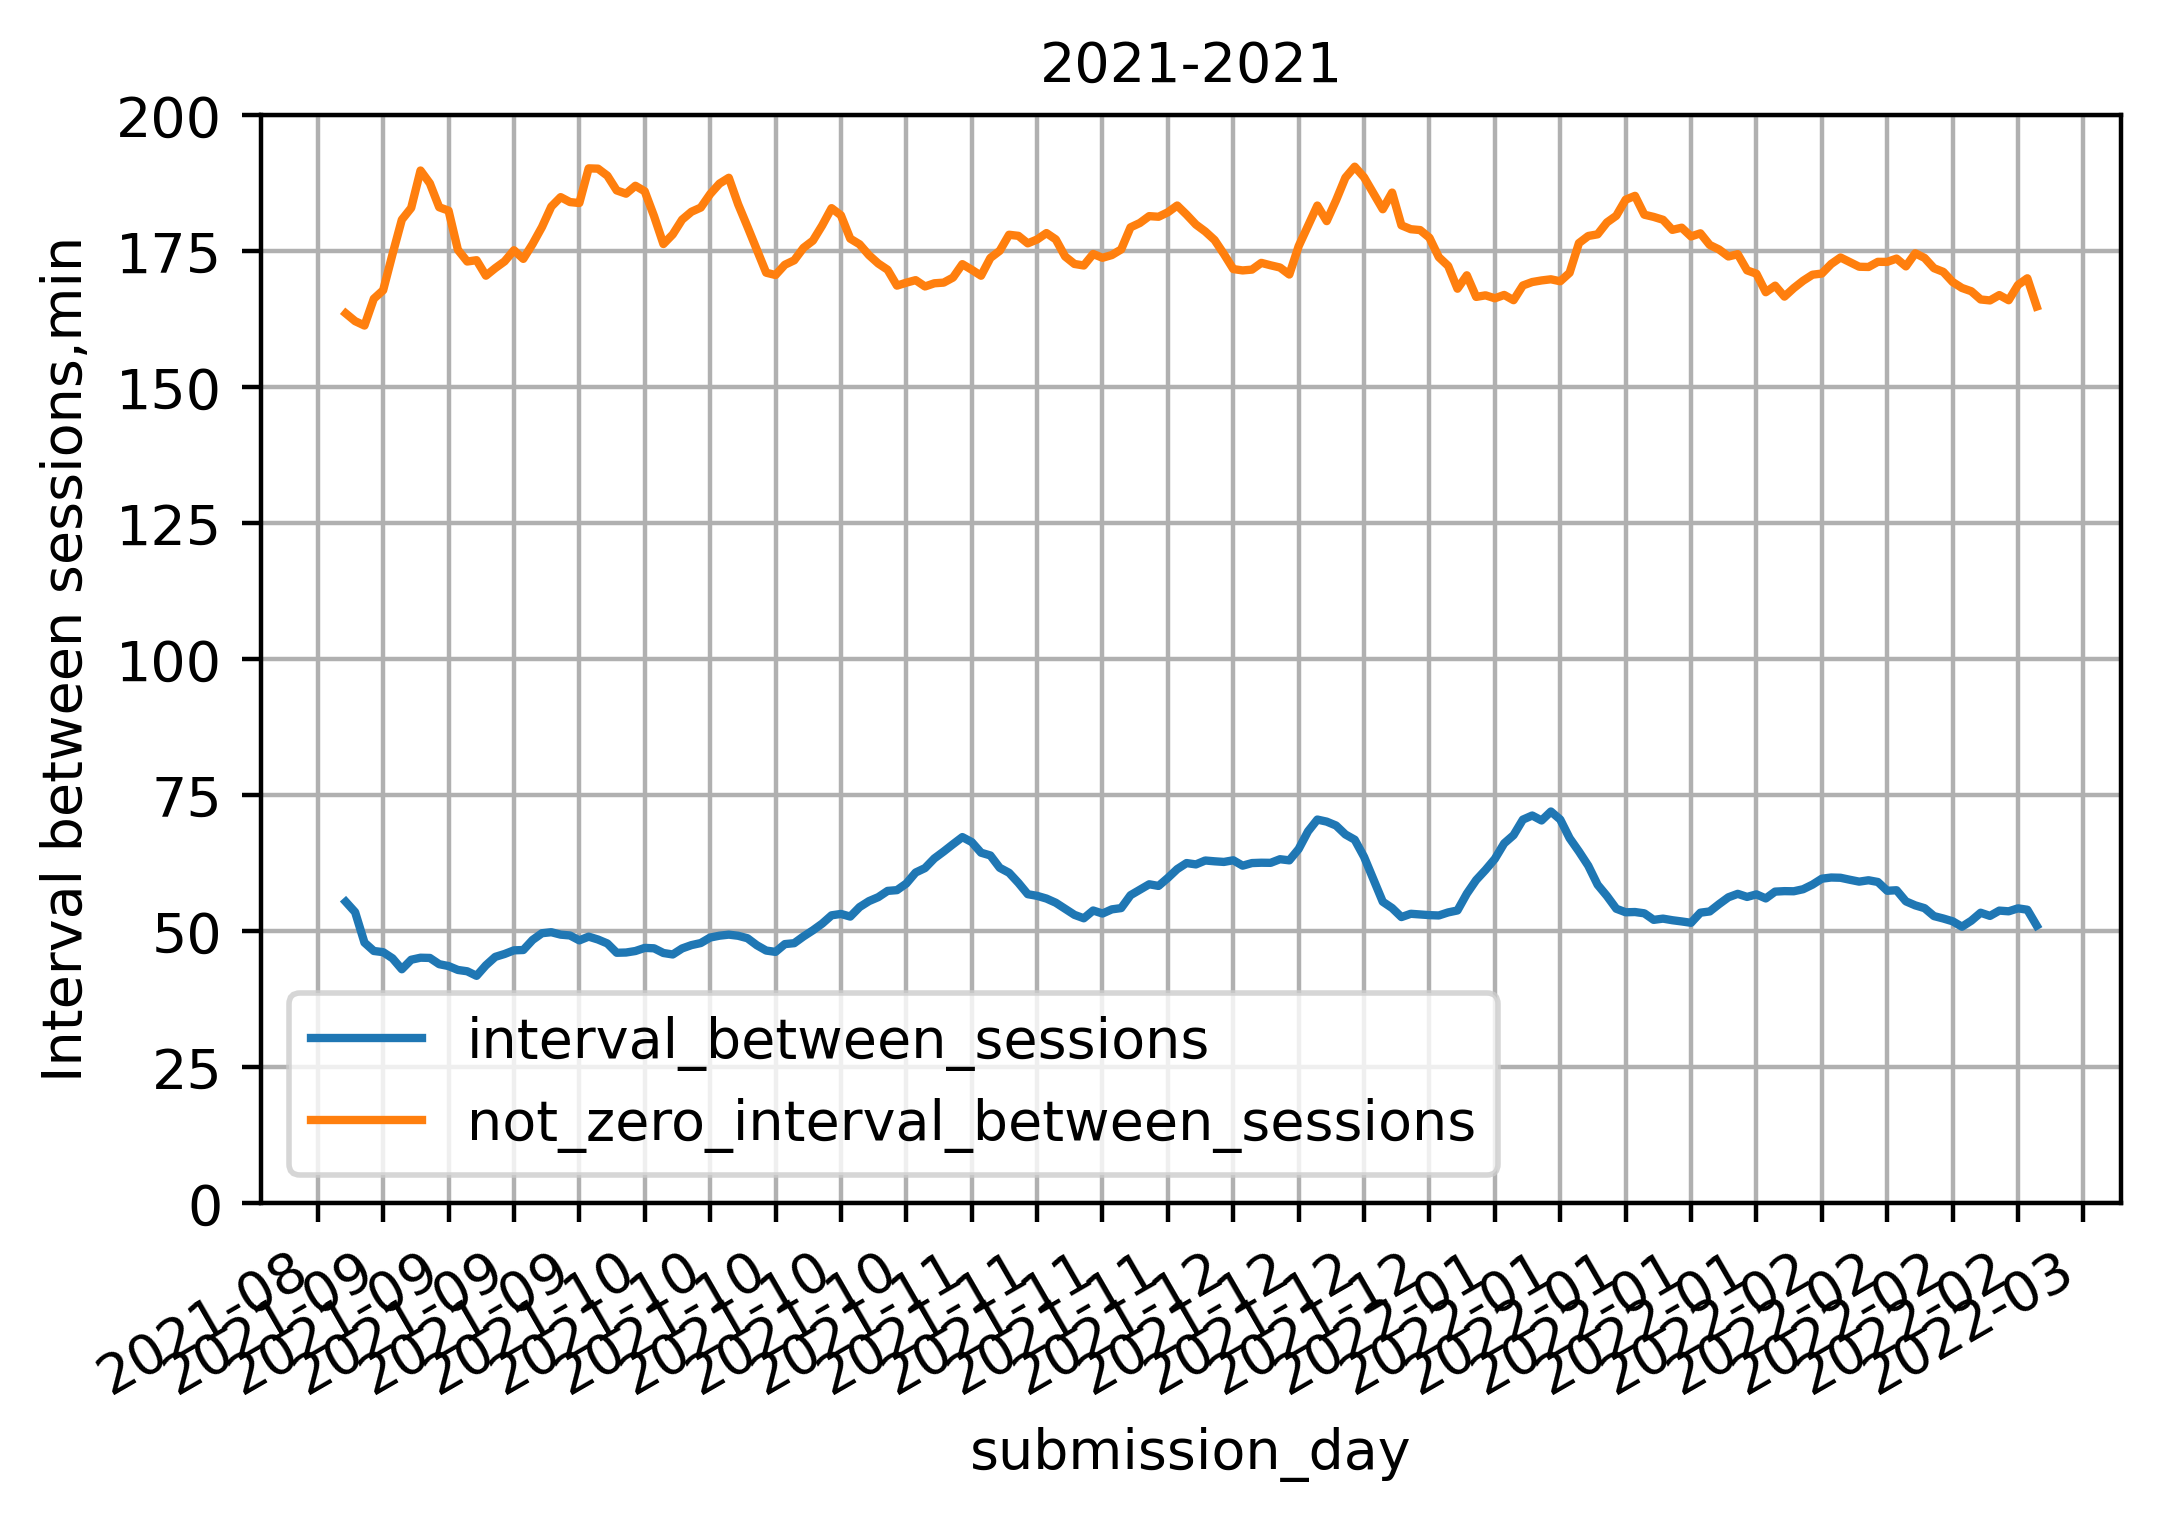

In [10]:
# средний интервал между сессиями сглаженное
# кажется не очень информативно из-за большого количества нулей
# добавила еще подсчет среднего только не по нулевым интервалам
def session_interval(sessions):
    if len(sessions) == 1:
        return 0
    intervals = []
    end_prev = sessions[0][-1]
    for cur_session in sessions[1:]:
        start_cur = cur_session[0]
        intervals.append((start_cur - end_prev)/ np.timedelta64(1, 'm'))
        end_prev = cur_session[-1]
    return np.mean(intervals)
    

tasks = df_best[df_best['course_element_type']=='task'].sort_values('submission_time')
tasks['submission_time'] = pd.to_datetime(tasks['submission_time'])
tasks['submission_day'] = tasks['submission_time'].apply(lambda x: x.date())
sessions = tasks.groupby(['submission_day','user_id']).agg({'submission_time': lambda x: split_session(x)})
sessions['interval_between_sessions']  = sessions['submission_time'].apply(lambda x: session_interval(x))
sessions.pop('submission_time')
intervals = sessions.groupby(['submission_day']).mean()
not_zero_intervals = sessions[sessions['interval_between_sessions'] != 0].groupby(['submission_day']).mean()
not_zero_intervals.rename(columns={'interval_between_sessions': 'not_zero_interval_between_sessions'}, inplace=True)

intervals = intervals.reset_index()
intervals =intervals[intervals['submission_day']>datetime.date(2021,8,25)]
intervals = intervals.set_index('submission_day')


not_zero_intervals = not_zero_intervals.reset_index()
not_zero_intervals = not_zero_intervals[not_zero_intervals['submission_day']>datetime.date(2021,8,25)]
not_zero_intervals = not_zero_intervals.set_index('submission_day')

fig = plt.figure(dpi = 400)
plt.title('2021-2021', fontsize=10)
plt.ylabel('Interval between sessions,min', fontsize=10)
ax = fig.add_subplot(111)

#ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
intervals.rolling(7).mean().plot(ax=ax)
not_zero_intervals.rolling(7).mean().plot(ax=ax)
fig.autofmt_xdate()

ax.grid(True)
plt.ylim(0, 200)
plt.show()




In [11]:
sample = np.array(not_zero_intervals['not_zero_interval_between_sessions'])
print(sample.mean())
print(sample.std(ddof=1))

175.29482446927582
13.005058529898392


<ipython-input-23-680f8a0e0d67>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


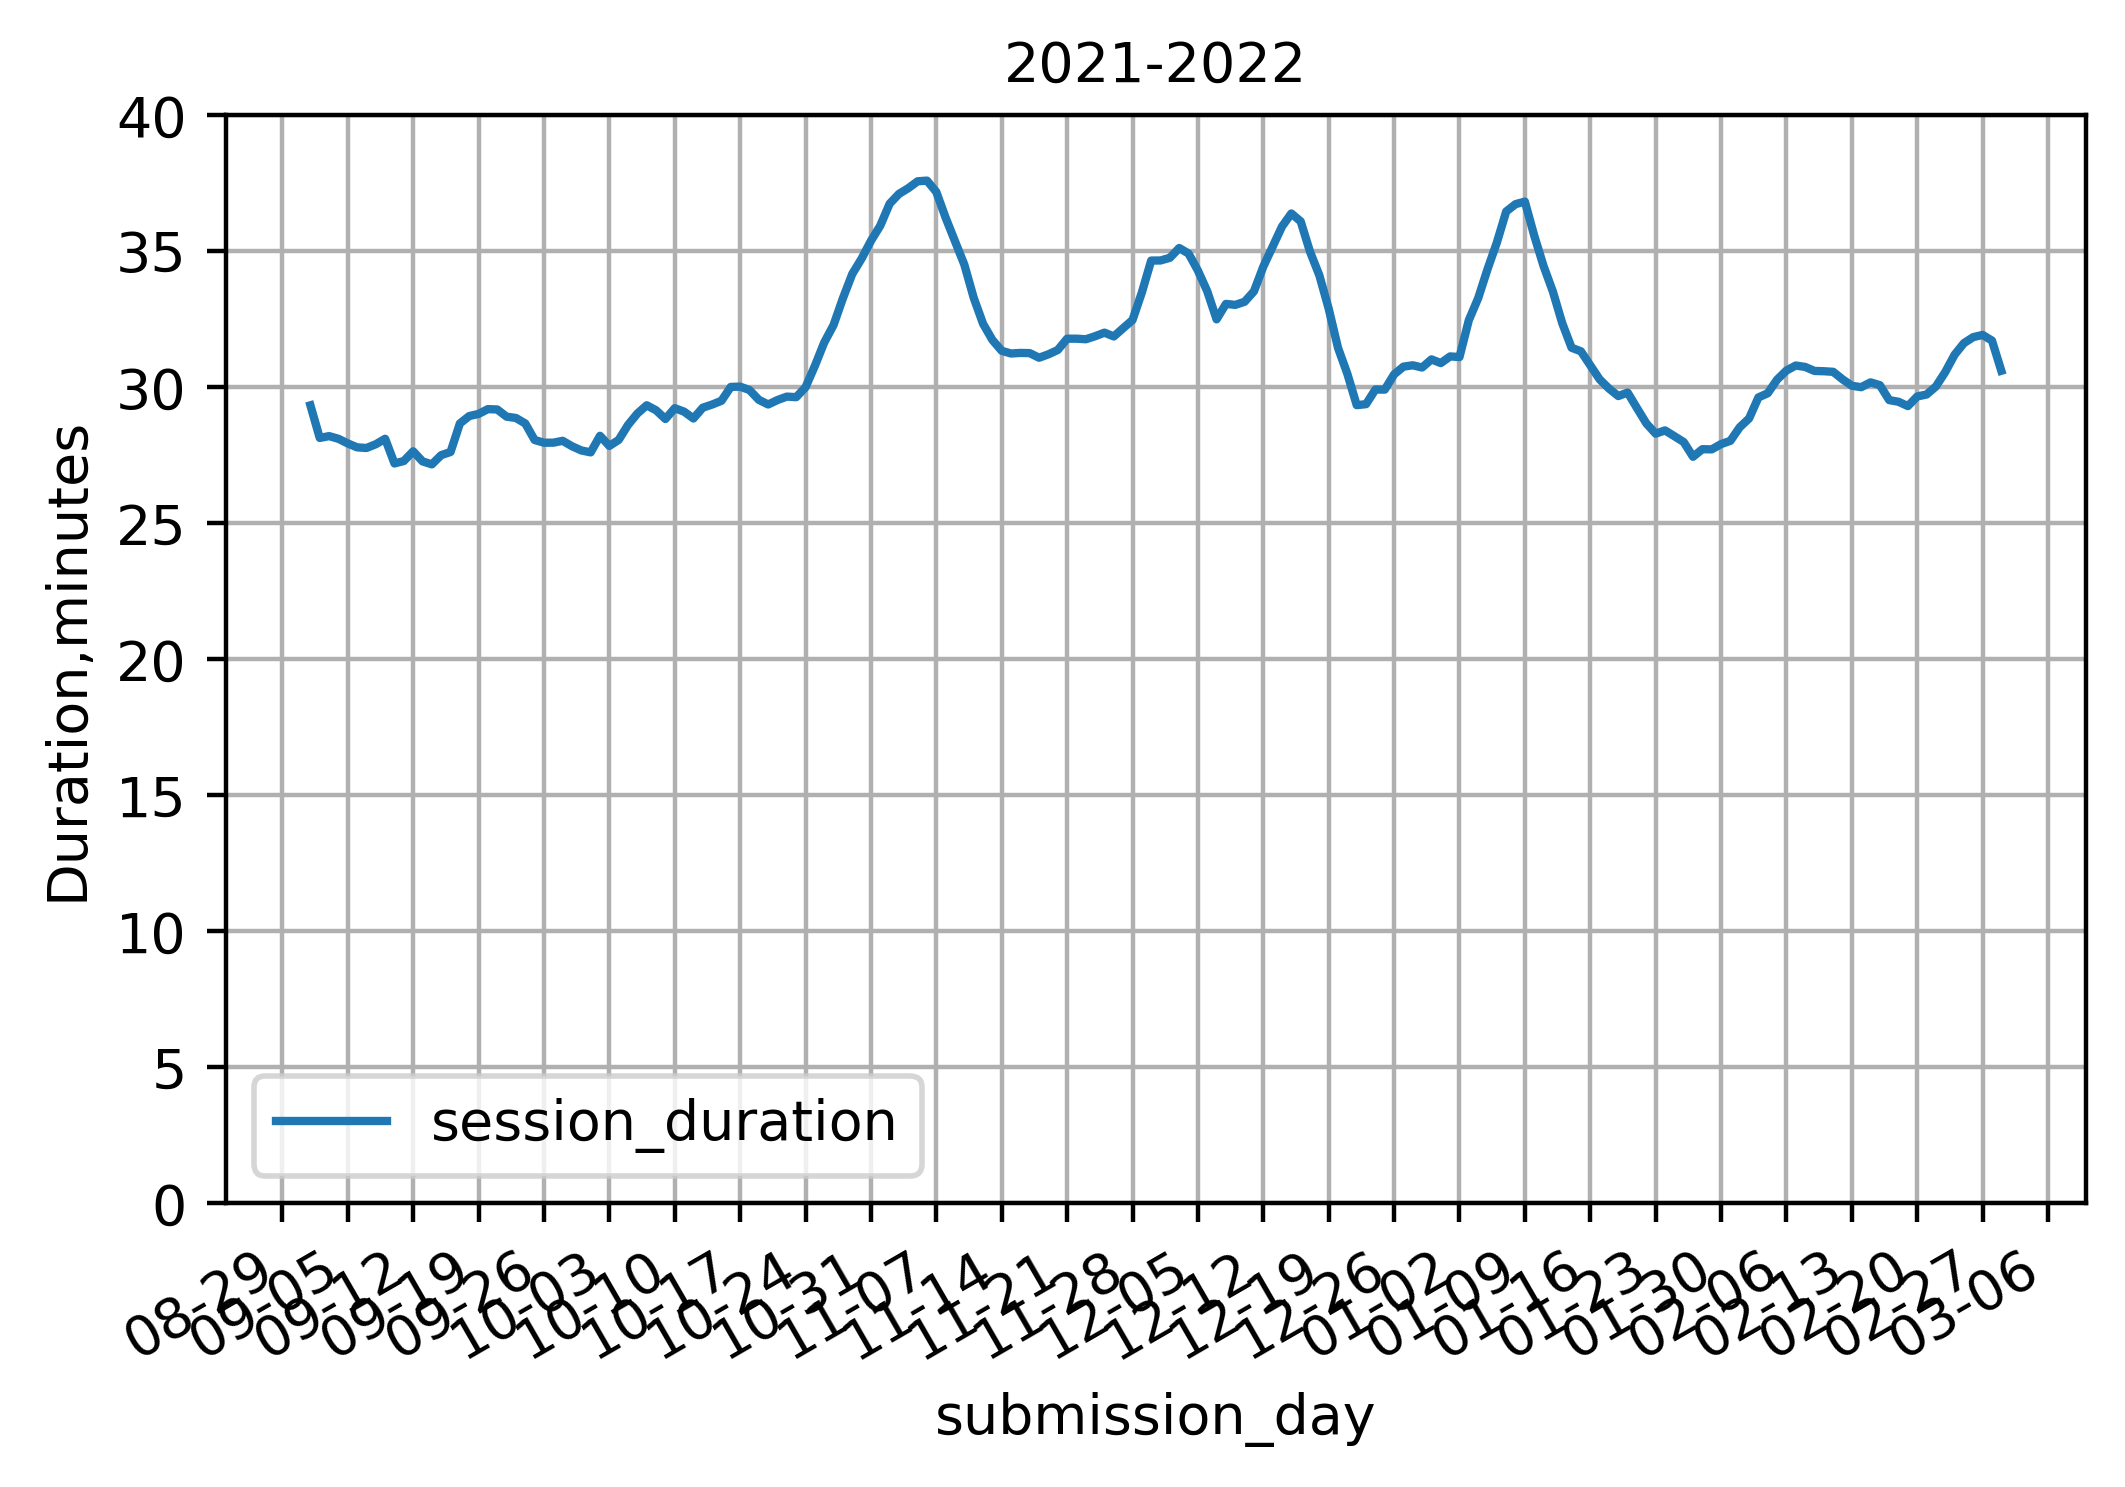

In [23]:
#  продолжительность сессии сглаженное

def session_duration(sessions):
    durations = [(session[-1]-session[0])/np.timedelta64(1, 'm') for session in sessions]
    return np.mean(durations)

tasks = df_best[df_best['course_element_type']=='task'].sort_values('submission_time')
tasks['submission_time'] = pd.to_datetime(tasks['submission_time'])
tasks['submission_day'] = tasks['submission_time'].apply(lambda x: x.date())
sessions = tasks.groupby(['submission_day','user_id']).agg({'submission_time': lambda x: split_session(x)})
sessions['session_duration']  = sessions['submission_time'].apply(lambda x: session_duration(x))
sessions.pop('submission_time')

duration = sessions.groupby('submission_day').mean()

duration = duration.reset_index()
duration = duration[duration['submission_day']>datetime.date(2021,8,25)]
duration = duration.set_index('submission_day')



fig = plt.figure(dpi = 400)
plt.ylabel('Duration,minutes', fontsize=10)
ax = fig.add_subplot(111)

#ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

duration.rolling(7).mean().plot(ax=ax)
fig.autofmt_xdate()

ax.grid(True)
plt.title('2021-2022', fontsize=10)
plt.ylim(0, 40)
plt.show()

